# Práctica de la asignatura Machine Learning 101
### *Alumno: David Jiménez Vicente*

-----

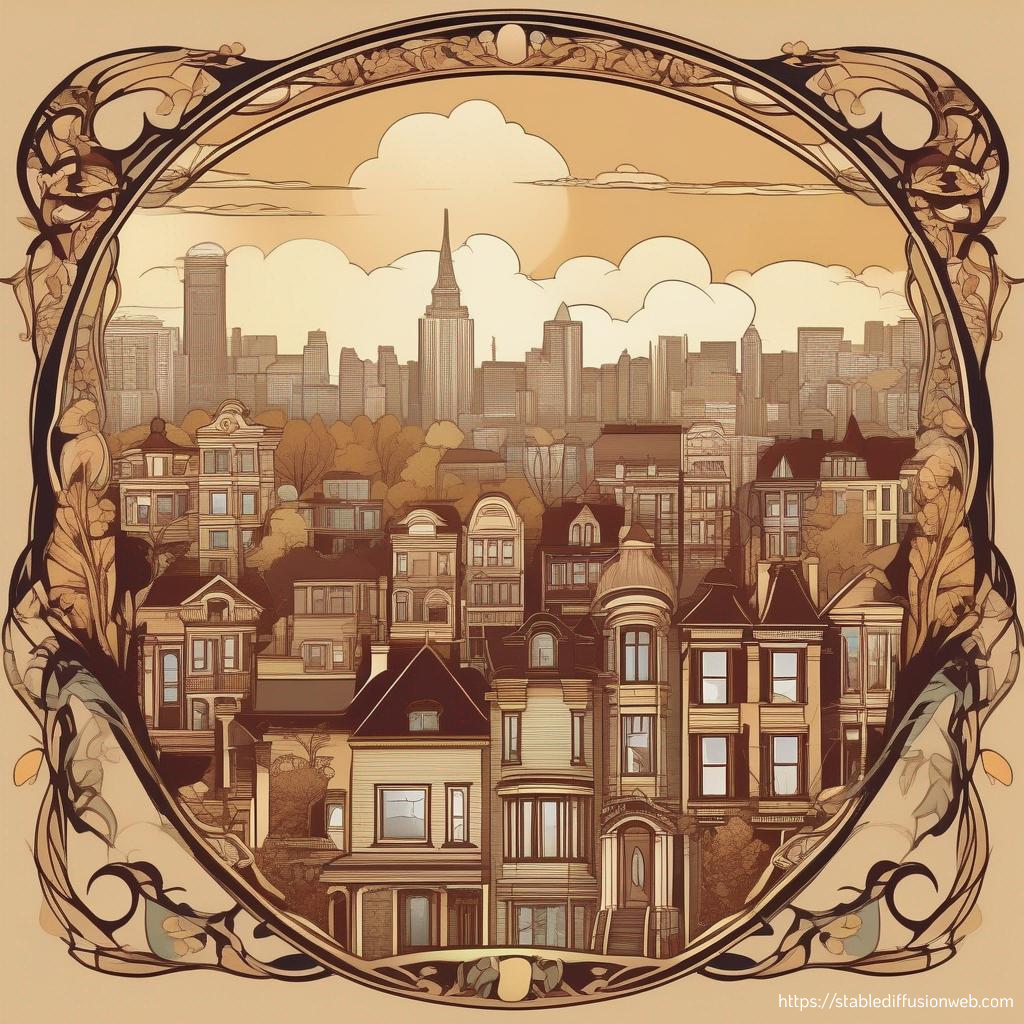

# Enunciado:
#### Se nos pide analizar con técnicas de ML un dataset de AirBnb y crear un modelo para predecir el precio de los alquileres en Madrid.

# Apartado 1: Importación de librerías estándar y de los datos  

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

#### · Guardo la url de los datos en una variable para mejorar la manipulación:

In [239]:
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"

#### · Usamos Pandas para la carga, EDA y transformación de los datos:

In [240]:
df = pd.read_csv(url, sep=";")

----

## Apartado 2: EDA

####   *Realizaré el EDA y el Preproc antes de hacer la división de los datos entre Train y Test para que ambos datasets tengan estructuras similares. Las mismas directrices de Preprocesado, Selección de características y Transformación, así como Nuevas características se aplicarán a los datos nuevos una vez en producción.*

#### · Empezaremos por un EDA cuantitativo y cualitativo:

In [241]:
# Veamos qué campos tiene el dataset:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [242]:
df.head()

ID                            Listing Url       Scrape ID  \
0  13531067  https://www.airbnb.com/rooms/13531067  20170402075052   
1  15459188  https://www.airbnb.com/rooms/15459188  20170407214050   
2  13184463  https://www.airbnb.com/rooms/13184463  20170407214050   
3  17115175  https://www.airbnb.com/rooms/17115175  20170407214050   
4   6766647   https://www.airbnb.com/rooms/6766647  20170306202425   

  Last Scraped                                             Name  \
0   2017-04-02                              AMSTERDAM, OUD-WEST   
1   2017-04-08                          Paseo De Gracia I (433)   
2   2017-04-08  Rooftop 2 terraces full of art, style and views   
3   2017-04-08            Flat close to Plaza España - Eixample   
4   2017-03-07                   5 Minutes to Downtown, Zilker!   

                                             Summary  \
0  Cozy private room with a double bed in Oud-Wes...   
1  Unique apartment in vibrant neighborhoods, car...   
2  Our place is  In the cross between Born, Barce...   
3  - Comfortable and clean double bedroom, with a...   
4  Get everywhere in minutes! Charming, tradition...   

                                               Space  \
0                                                NaN   
1  Its high ceilings, wooden floors, large window...   
2  The views above Barcelona are unique. The styl...   
3                                                NaN   
4  Located on a large tree-covered lot less than ...   

                                         Description Experiences Offered  \
0  Cozy private room with a double bed in Oud-Wes...                none   
1  Unique apartment in vibrant neighborhoods, car...                none   
2  Our place is  In the cross between Born, Barce...                none   
3  - Comfortable and clean double bedroom, with a...                none   
4  Get everywhere in minutes! Charming, tradition...                none   

                               Neighborhood Overview  ...  \
0                                                NaN  ...   
1                                                NaN  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  The Tarrytown neighborhood is best known for i...  ...   

  Review Scores Communication Review Scores Location Review Scores Value  \
0                        10.0                   10.0                 8.0   
1                         6.0                   10.0                 8.0   
2                        10.0                   10.0                10.0   
3                        10.0                   10.0                10.0   
4                        10.0                   10.0                10.0   

  License Jurisdiction Names Cancellation Policy  \
0     NaN                NaN            moderate   
1     NaN                NaN              strict   
2     NaN                NaN            flexible   
3     NaN                NaN              strict   
4     NaN                NaN              strict   

  Calculated host listings count Reviews per Month  \
0                            1.0              0.63   
1                           92.0              0.39   
2                            1.0              0.99   
3                            1.0              0.79   
4                            1.0              0.06   

                              Geolocation  \
0    52.36667871194905, 4.865594943841575   
1   41.39161588920901, 2.1681677061165425   
2   41.38136867557121, 2.1808743514708038   
3   41.38600531434205, 2.1433972223397064   
4  30.287123948461037, -97.76816361292846   

                                            Features  
0                               Host Has Profile Pic  
1  Host Has Profile Pic,Host Identity Verified,Is...  
2  Host Has Profile Pic,Host Identity Verified,Is...  
3  Host Has Profile Pic,Host Identity Verified,Is...  
4  Host Has Profile Pic,Host Identity Verified

In [243]:
df.describe(include="all")

ID                            Listing Url     Scrape ID  \
count   1.478000e+04                                  14780  1.478000e+04   
unique           NaN                                  14780           NaN   
top              NaN  https://www.airbnb.com/rooms/13531067           NaN   
freq             NaN                                      1           NaN   
mean    1.028089e+07                                    NaN  2.017037e+13   
std     5.564829e+06                                    NaN  5.667971e+08   
min     1.862800e+04                                    NaN  2.016010e+13   
25%     5.554732e+06                                    NaN  2.017041e+13   
50%     1.133492e+07                                    NaN  2.017041e+13   
75%     1.532631e+07                                    NaN  2.017041e+13   
max     1.910969e+07                                    NaN  2.017062e+13   

       Last Scraped                                Name  \
count         14780                               14779   
unique           37                               14375   
top      2017-04-08  Apartamento en el centro de Madrid   
freq          13627                                  12   
mean            NaN                                 NaN   
std             NaN                                 NaN   
min             NaN                                 NaN   
25%             NaN                                 NaN   
50%             NaN                                 NaN   
75%             NaN                                 NaN   
max             NaN                                 NaN   

                                                  Summary  \
count                                               14189   
unique                                              13289   
top     Unique apartment in vibrant neighborhoods, car...   
freq                                                   64   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    Space  \
count                                               10888   
unique                                              10174   
top     Los Apartamentos Good Stay Prado se encuentran...   
freq                                                   29   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              Description Experiences Offered  \
count                                               14774               14780   
unique                                              14281                   5   
top     Es un piso con 6 habitaciones de las que 5  ha...                none   
freq                                                   19               14763   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                        

In [244]:
# Guardaré la extensión original del dataset para posteriores cálculos
len_original = len(df)

#### *· Tiene demasiadas características para poder extraer información rápidamente. Se necesita hacer una primera selección de ecaracterísticas.*
#### · Empezaré por comprobar si todos los datos son de pisos de Madrid:

In [245]:
# Buscaremos los valores únicos en el campo "City"
df.City.sort_values().unique()

array(['Alaró', 'Albert Park', 'Alcudia', 'Alcúdia', 'Algaida',
       'Amsterdam', 'Andratx', 'Antwerpen', 'Aravaca', 'Aravaca (Madrid)',
       'Ariany', 'Athens', 'Athina', 'Austin', 'Balearic Islands',
       'Ballsbridge', 'Barcelona', 'Berlin', 'Berlín', 'Berowra Waters',
       'Betlem', 'Beverly Hills', 'Biniamar', 'Binissalem',
       'Binissalem-Mallorca DO', 'Boadilla del Monte', 'Bondi',
       'Bondi Beach', 'Bondi Junction', 'Boston', 'Brent', 'Bronx',
       'Brooklyn', 'Brunswick', 'Brussel', 'Bruxelles', 'Bunyola',
       'Búger', 'Caimari', 'Cala Agulla', 'Cala Anguila-Cala Mendia',
       'Cala Ferrera', 'Cala Magrana', 'Cala Murada', 'Cala Pi',
       'Cala Ratjada', 'Cala Santanyí', 'Calvià', 'Campanet', 'Campos',
       'Can Pastilla', 'Can Picafort', 'Centro', 'Centro, Madrid',
       'Chelsea, London', 'Chicago', 'Chiva', 'Chueca', 'Chueca, Madrid',
       'Clongriffin', 'Cologny', 'Colonia Sant Pere',
       'Colonia de Sant Pere', 'Colònia de Sant Jordi',
    

#### *Se aprecian 246 nombres de ciudad distintos. Sólo debería haber uno. Además, hay varias maneras de escribir Madrid, pero todas parecen contener los caracteres "mad".*
#### *También hay barrios de Madrid inscritos en el campo Ciudad. Haré un primer filtrado con eso.*

In [246]:
# Seleccionamos por los caracteres "mad" o algunos nombres que pertenecen a Madrid
df_madrid = df[df.City.str.contains("Mad") | df.City.str.contains("mad") | df.City.str.contains("MAD") | df.City.str.contains("Aravaca") | df.City.str.contains("villa verde bajo") | df.City.str.contains("Chueca") | df.City.str.contains("Ventas") | df.City.str.contains("Boadilla") | df.City.str.contains("Elipa") | df.City.str.contains("Pozuelo") | df.City.str.contains("de Henares") | df.City.str.contains("Delicias")]
df_madrid.City.sort_values().unique()

array(['Aravaca', 'Aravaca (Madrid)', 'Boadilla del Monte',
       'Centro, Madrid', 'Chueca', 'Chueca, Madrid',
       'Comunidad de Madrid', 'Delicias', 'Delicias-Madrid', 'La Elipa',
       'MADRID', 'Madid', 'Madri', 'Madrid',
       'Madrid, Comunidad de Madrid, ES',
       'Madrid, Comunidad de Madrid, ESPANA',
       'Madrid, Vallecas (Fontarrón)', 'Pozuelo', 'Pozuelo de Alarcón',
       'San Fernando de Henares', 'Ventas', 'las matas  madrid', 'madrid',
       'villa verde bajo'], dtype=object)

In [247]:
len_madrid0 = len(df_madrid)

### Filtrado de características previas al Split, usando conocimiento del dominio:

Vamos a eliminar algunas columnas que no deberían afectar al precio a priori, antes del análisis:  
- Eliminaré la columna "Ciudad", ya que sólo hay una en todo el dataset.  
- Aquellas que hablan del propietario, fotos, urls, IDs, o son descripciones de texto.
- La calle tampoco la usaré, ya que hay calles que pueden ser de varios quilómetros y abarcar un montón de precios diferentes al atravesar varios barrios.
- El Zipcode lo olimino porque está muy relacionado con los barrios y resultará redundante.
- En cuanto a los barrios sólo me quedaré el barrio general al ser muy redundantes las tres variables de barrio, y conservaré los zipcodes, a falta de analizar su correlación con los barrios.
- Demarcaciones políticas tampoco, ni datos de geolocalización, ya que nos limitamos a Madrid.
- También eliminaré características redundantes de precios por semana, mes para quedarn os con el precio diario.
- La disponibilidad podría afectar al precio, ya que si es muy demandado el propietario podría elevar los precios, así que me centraré en un indicador de disponibilidad de 90 días como indicador medio de lo demandado que está un piso.
- Así mismo, nos da igual cuándo se han extraído los datos de la web.
- En cuanto a las valoraciones, sólo me interesará el rating general.
- Hay varias features de tipo administrativo que se eliminarán del final de las columnas.

In [248]:
df_madrid = df_madrid.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary','Space', 'Description', 'Experiences Offered', 'Neighborhood Overview','Notes', 'Transit', 'Access', 'Interaction', 'House Rules','Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location','Host About', 'Host Response Time', 'Host Response Rate','Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url','Host Neighbourhood', 'Host Listings Count','Host Total Listings Count', 'Host Verifications', 'Street', 'Market','Smart Location', 'Country Code', 'Country', 'City', 'Zipcode', 'State','Latitude', 'Longitude', 'Weekly Price','Monthly Price', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated','Has Availability', 'Availability 30', 'Availability 60', 'Availability 365', 'Calendar last Scraped','Number of Reviews', 'First Review', 'Last Review', 'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 'Review Scores Location','Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count','Reviews per Month', 'Geolocation', 'Features'], axis=1)

In [249]:
# Comprobamos el resultado
df_madrid.head()

Neighbourhood        Neighbourhood Cleansed Neighbourhood Group Cleansed  \
63    Villaverde                      Butarque                   Villaverde   
64    Villaverde                   Los Angeles                   Villaverde   
65     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   
66     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   
67     Vicálvaro  Casco Histórico de Vicálvaro                    Vicálvaro   

   Property Type        Room Type  Accommodates  Bathrooms  Bedrooms  Beds  \
63     Apartment     Private room             1        1.0       1.0   1.0   
64     Apartment     Private room             2        NaN       1.0   1.0   
65     Apartment     Private room             1        2.0       2.0   2.0   
66          Loft  Entire home/apt             4        1.5       1.0   3.0   
67     Apartment  Entire home/apt             5        1.0       2.0   4.0   

    Bed Type                                          Amenities  Square Feet  \
63  Real Bed  TV,Internet,Wireless Internet,Pool,Free parkin...          NaN   
64  Real Bed                                                NaN          0.0   
65  Real Bed  TV,Wireless Internet,Kitchen,Pets allowed,Door...          NaN   
66  Real Bed  TV,Internet,Wireless Internet,Air conditioning...          0.0   
67  Real Bed  TV,Kitchen,Free parking on premises,Smoking al...          NaN   

    Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  \
63   18.0               NaN           NaN                1             0   
64  190.0               NaN           NaN                1             0   
65   23.0               NaN          10.0                1             0   
66   39.0             450.0          20.0                3             8   
67   45.0             100.0          40.0                4            15   

    Availability 90  Review Scores Rating Cancellation Policy  
63               83                  93.0            flexible  
64               90                   NaN            flexible  
65               58                  80.0            flexible  
66               60                  94.0            moderate  
67                8                   NaN            flexible

#### · De cara a añadir una cierta localización que pueda afectar al precio, elegiré una de las 3 características de barrios que hay:

In [250]:
# Revisemos los 3 campos de barrios
df_madrid[["Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]].describe(include="all")

Neighbourhood Neighbourhood Cleansed Neighbourhood Group Cleansed
count           8766                  13263                        13263
unique            65                    126                           21
top         Malasaña            Embajadores                       Centro
freq             895                   1849                         6775

#### *El campo "Neighbourhood" tiene una cuenta bastante inferior a los otros, lo que indica que tiene muchos valores NA. Revisemoslo:*

In [251]:
df_cont_na = df_madrid[["Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed"]].info()
#df_cont_na.loc["Total_nas"] = df_cont_na.sum(axis=0)
df_cont_na

<class 'pandas.core.frame.DataFrame'>
Index: 13263 entries, 63 to 14769
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 8766 non-null   object
 1   Neighbourhood Cleansed        13263 non-null  object
 2   Neighbourhood Group Cleansed  13263 non-null  object
dtypes: object(3)
memory usage: 414.5+ KB


In [252]:
df_madrid["Neighbourhood Cleansed"].nunique()

126

In [253]:
df_madrid["Neighbourhood Group Cleansed"].nunique()

21

#### *El campo "Neighbourhood" se eliminará al tener tanta información no válida. Nos quedaremos los otros dos indicadores de barrio y lo analizaremos tras el split.*

In [254]:
# Eliminamos las columnas:
df_madrid = df_madrid.drop(["Neighbourhood"], axis=1)
df_madrid.head()

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
63                      Butarque                   Villaverde     Apartment   
64                   Los Angeles                   Villaverde     Apartment   
65  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
66  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
67  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   

          Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
63     Private room             1        1.0       1.0   1.0  Real Bed   
64     Private room             2        NaN       1.0   1.0  Real Bed   
65     Private room             1        2.0       2.0   2.0  Real Bed   
66  Entire home/apt             4        1.5       1.0   3.0  Real Bed   
67  Entire home/apt             5        1.0       2.0   4.0  Real Bed   

                                            Amenities  Square Feet  Price  \
63  TV,Internet,Wireless Internet,Pool,Free parkin...          NaN   18.0   
64                                                NaN          0.0  190.0   
65  TV,Wireless Internet,Kitchen,Pets allowed,Door...          NaN   23.0   
66  TV,Internet,Wireless Internet,Air conditioning...          0.0   39.0   
67  TV,Kitchen,Free parking on premises,Smoking al...          NaN   45.0   

    Security Deposit  Cleaning Fee  Guests Included  Extra People  \
63               NaN           NaN                1             0   
64               NaN           NaN                1             0   
65               NaN          10.0                1             0   
66             450.0          20.0                3             8   
67             100.0          40.0                4            15   

    Availability 90  Review Scores Rating Cancellation Policy  
63               83                  93.0            flexible  
64               90                   NaN            flexible  
65               58                  80.0            flexible  
66               60                  94.0            moderate  
67                8                   NaN            flexible

#### · Volvamos a resumir el dataset restante:

In [255]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13263 entries, 63 to 14769
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13263 non-null  object 
 1   Neighbourhood Group Cleansed  13263 non-null  object 
 2   Property Type                 13263 non-null  object 
 3   Room Type                     13263 non-null  object 
 4   Accommodates                  13263 non-null  int64  
 5   Bathrooms                     13214 non-null  float64
 6   Bedrooms                      13240 non-null  float64
 7   Beds                          13214 non-null  float64
 8   Bed Type                      13263 non-null  object 
 9   Amenities                     13154 non-null  object 
 10  Square Feet                   520 non-null    float64
 11  Price                         13254 non-null  float64
 12  Security Deposit              5645 non-null   float64
 13  Clean

#### · Todas las variables Object que quedan parecen categóricas, menos "Amenities". El campo "Amenities" podría aportar información al modelo a pesar de ser string. Si tiene más o menos comodidades podría afectar al precio al subir el nivel del apartamento. Vamos a estudiarla:

#### *Revisemos primero cuántos NaN tiene:*

In [256]:
print(f"Hay {sum(df_madrid.Amenities.isna())} filas con NA en 'Amenities', eso es un {sum(df_madrid.Amenities.isna()) / len(df_madrid) * 100}% de los datos")


Hay 109 filas con NA en 'Amenities', eso es un 0.8218351805775466% de los datos


#### *Podría usarse. Son pocos nulos, y si los sustituímos por la media de cantidad de Amenities, podría valer para el modelo.*  
#### · Vamos a crear una nueva característica que se usará en todos los datasets que entren: "Amenities Count". Será cuantitativa, no categórica. Queremos saber si la cantidad de comodidades afecta al precio.

In [257]:
# Reharemos el índice de nuevo para que empiece desde 0 secuencialmente:
df_madrid.reset_index(drop=True, inplace=True)

In [258]:
df_madrid.Amenities.head(30)

0     TV,Internet,Wireless Internet,Pool,Free parkin...
1                                                   NaN
2     TV,Wireless Internet,Kitchen,Pets allowed,Door...
3     TV,Internet,Wireless Internet,Air conditioning...
4     TV,Kitchen,Free parking on premises,Smoking al...
5     TV,Wireless Internet,Free parking on premises,...
6     TV,Internet,Wireless Internet,Kitchen,Smoking ...
7     Wireless Internet,Air conditioning,Doorman,Pet...
8     Wireless Internet,Air conditioning,Pool,Kitche...
9     Smoking allowed,translation missing: en.hostin...
10    TV,Internet,Wireless Internet,Air conditioning...
11    Wireless Internet,Kitchen,Heating,Washer,First...
12    TV,Cable TV,Internet,Wireless Internet,Wheelch...
13    TV,Internet,Wireless Internet,Air conditioning...
14    Internet,Wireless Internet,Air conditioning,Ki...
15    Smoking allowed,Pets allowed,Suitable for even...
16    Kitchen,Breakfast,Heating,Family/kid friendly,...
17    Internet,Wireless Internet,Wheelchair acce

*Vemos que en el campo 9 hay valores extraños:*

In [259]:
df_madrid.Amenities[9]

'Smoking allowed,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50'

#### *Encontramos items en los listados de Amenities que son errores. Los eliminaremos del dataset de entrada al hacer el siguiente loop.*

In [260]:
# Haré un loop para crear una columna en el dataset que tenga el conteo de cuántas comodidades hay en cada una, ya que parecen estar separados por comas:
#counter=0
for idx, row in df_madrid.Amenities.items():
    counter=0
    if not pd.isna(row):
        for word in row.split(sep=","):
            if "translation missing" not in word:
                counter += 1
    df_madrid.loc[idx,"Amenities Count"] = int(counter)
    

In [261]:
# Pondré el tipo correcto a la columna, que resulta tras el loop en un float. También eliminaré la columna Amenities, que ya no vamos a usar.
df_madrid["Amenities Count"] = df_madrid["Amenities Count"].astype(int)
df_madrid = df_madrid.drop("Amenities", axis=1)
df_madrid.head(10)

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
0                      Butarque                   Villaverde     Apartment   
1                   Los Angeles                   Villaverde     Apartment   
2  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
3  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
4  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
5  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
6                      Simancas        San Blas - Canillejas     Apartment   
7                      Simancas        San Blas - Canillejas     Apartment   
8                         Rejas        San Blas - Canillejas     Apartment   
9                      Salvador        San Blas - Canillejas     Apartment   

         Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  \
0     Private room             1        1.0       1.0   1.0  Real Bed   
1     Private room             2        NaN       1.0   1.0  Real Bed   
2     Private room             1        2.0       2.0   2.0  Real Bed   
3  Entire home/apt             4        1.5       1.0   3.0  Real Bed   
4  Entire home/apt             5        1.0       2.0   4.0  Real Bed   
5     Private room             1        1.0       1.0   1.0  Real Bed   
6     Private room             2        1.0       1.0   1.0  Real Bed   
7     Private room             1        1.0       1.0   1.0  Real Bed   
8     Private room             2        1.0       1.0   1.0  Real Bed   
9     Private room             2        1.0       1.0   1.0  Real Bed   

   Square Feet  Price  Security Deposit  Cleaning Fee  Guests Included  \
0          NaN   18.0               NaN           NaN                1   
1          0.0  190.0               NaN           NaN                1   
2          NaN   23.0               NaN          10.0                1   
3          0.0   39.0             450.0          20.0                3   
4          NaN   45.0             100.0          40.0                4   
5          NaN   16.0             250.0           5.0                1   
6          NaN   18.0               NaN           NaN                1   
7          NaN   15.0               NaN           NaN                1   
8          NaN   40.0               NaN           NaN                2   
9          NaN   30.0               NaN           NaN                2   

   Extra People  Availability 90  Review Scores Rating Cancellation Policy  \
0             0               83                  93.0            flexible   
1             0               90                   NaN            flexible   
2             0               58                  80.0            flexible   
3             8               60                  94.0            moderate   
4            15                8                   NaN            flexible   
5             0                0                  85.0            moderate   
6             8               25                 100.0            flexible   
7             0               18                  98.0            moderate   
8             0                0                   NaN            flexible   
9            10               89                   NaN            flexible   

   Amenities Count  
0               14  
1                0  
2               17  
3               19  
4               15  
5                5  
6               12  
7               10  
8               10  
9                1

#### · Repasemos el dataset de nuevo:

In [262]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13263 entries, 0 to 13262
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13263 non-null  object 
 1   Neighbourhood Group Cleansed  13263 non-null  object 
 2   Property Type                 13263 non-null  object 
 3   Room Type                     13263 non-null  object 
 4   Accommodates                  13263 non-null  int64  
 5   Bathrooms                     13214 non-null  float64
 6   Bedrooms                      13240 non-null  float64
 7   Beds                          13214 non-null  float64
 8   Bed Type                      13263 non-null  object 
 9   Square Feet                   520 non-null    float64
 10  Price                         13254 non-null  float64
 11  Security Deposit              5645 non-null   float64
 12  Cleaning Fee                  7845 non-null   float64
 13  G

#### *De manera muy inconveniente, la variable de "Square Feet" casi no tiene registros. No podremos usarla por la falta de información y la imposibilidad de imputar lógicamente los datos faltantes. Esto se podrá revisar en el futuro si los métodos de recogida de datos se modifican para que esta variable sea fiable. Aún así, vamos a revisarlo un momento:*

Estudio la viabilidad de usar los datos existentes para inferir una media por barrio:

In [263]:
# Haré un diccionario para analizar qué tanto por ciento de valores no Nan hay en cada barrio:
dicc_feet = {}
for i in df_madrid["Neighbourhood Group Cleansed"].unique():
    dicc_feet[i] = {}
    dicc_feet[i]["Totales"] = len(df_madrid[df_madrid["Neighbourhood Group Cleansed"]==i])
    dicc_feet[i]["No_Na"] = 0
    dicc_feet[i]["Porcentaje_No_Na"] = 0
for idx, barrio in df_madrid["Neighbourhood Group Cleansed"].items():
    counter = 0
    if not pd.isna(df_madrid.loc[idx, "Square Feet"]):
        dicc_feet[barrio]["No_Na"] += 1
    dicc_feet[barrio]["Porcentaje_No_Na"] = round(dicc_feet[barrio]["No_Na"]/dicc_feet[barrio]["Totales"]*100,2)

In [264]:
dicc_feet

{'Villaverde': {'Totales': 82, 'No_Na': 3, 'Porcentaje_No_Na': 3.66},
 'Vicálvaro': {'Totales': 34, 'No_Na': 4, 'Porcentaje_No_Na': 11.76},
 'San Blas - Canillejas': {'Totales': 117,
  'No_Na': 10,
  'Porcentaje_No_Na': 8.55},
 'Barajas': {'Totales': 79, 'No_Na': 4, 'Porcentaje_No_Na': 5.06},
 'Carabanchel': {'Totales': 358, 'No_Na': 8, 'Porcentaje_No_Na': 2.23},
 'Usera': {'Totales': 144, 'No_Na': 1, 'Porcentaje_No_Na': 0.69},
 'Puente de Vallecas': {'Totales': 222, 'No_Na': 6, 'Porcentaje_No_Na': 2.7},
 'Moratalaz': {'Totales': 74, 'No_Na': 2, 'Porcentaje_No_Na': 2.7},
 'Latina': {'Totales': 379, 'No_Na': 14, 'Porcentaje_No_Na': 3.69},
 'Chamberí': {'Totales': 958, 'No_Na': 29, 'Porcentaje_No_Na': 3.03},
 'Fuencarral - El Pardo': {'Totales': 152,
  'No_Na': 4,
  'Porcentaje_No_Na': 2.63},
 'Moncloa - Aravaca': {'Totales': 424, 'No_Na': 12, 'Porcentaje_No_Na': 2.83},
 'Ciudad Lineal': {'Totales': 308, 'No_Na': 8, 'Porcentaje_No_Na': 2.6},
 'Hortaleza': {'Totales': 184, 'No_Na': 3, 'Po

Definitivamente, no se puede usar. En el mejor de los casos de barrios, sólo un 11% de los pisos tiene valores representativos, aunque la tendencia es entre un 2 y un 4%. Eso no puede definir la media de toda la población de pisos de cada barrio.  
Elimino la columna:

In [265]:
df_madrid = df_madrid.drop("Square Feet", axis=1)

#### · Hablemos de las variables categóricas: todas las que son object. Vamos a revisarlas:

In [266]:
df_madrid[["Neighbourhood Group Cleansed", "Neighbourhood Cleansed", "Property Type", "Room Type", "Bed Type", "Cancellation Policy"]].describe()

Neighbourhood Group Cleansed Neighbourhood Cleansed Property Type  \
count                         13263                  13263         13263   
unique                           21                    126            22   
top                          Centro            Embajadores     Apartment   
freq                           6775                   1849         10932   

              Room Type  Bed Type Cancellation Policy  
count             13263     13263               13263  
unique                3         5                   5  
top     Entire home/apt  Real Bed              strict  
freq               7926     12968                5008

#### *Efectivamente son categóricas, se puede deducir del número de valores únicos. Vamos a codificarlas casi todas con Mean Encoder tras el split, pero ahora codificaré "Cancellation Policy" con un LabelEncoding Ordinal, porque esta variable sí que es más restrictiva según cambia su categoría, desde un nivel 0 "Flexible" hasta un nivel 4 super estricto 60 días:*

In [267]:
from sklearn.preprocessing import LabelEncoder
le_canc = LabelEncoder()
df_madrid["Cancellation Policy"] = le_canc.fit_transform(df_madrid["Cancellation Policy"])
listado_canc = [(idx,clase) for idx, clase in enumerate(le_canc.classes_)]
listado_canc

[(0, 'flexible'),
 (1, 'moderate'),
 (2, 'strict'),
 (3, 'super_strict_30'),
 (4, 'super_strict_60')]

Efectivamente, según crece el índice crece el nivel de restricción.

#### · Hay dos variables, El depósito de seguro y la Tasa de limpieza, que podrían ser importantes. Aunque las analizaré bien tras el Split, voy a hacer un pequeño EDA gráfico de ambas para saber si a medida que aumenta el precio de alquiler, aumenta la variable. Si parecen tener relación lineal, las usaré después del split, y si parecen aleatorias, las convertiré antes del split a categóricas de Si o No presentes, para estudiar tras el split el hecho de que afecte al precio si hay o no hay tasas.

*-Los propietarios han de escoger al publicar el piso en AirBnb si pedir o no pedir un "Cleaning Fee" y un "Security Deposit", y en el caso de pedirlo had de especificar la cantidad. Es por eso que para estas dos variables, si hay NaNs, significa que el propietario ha decidido no pedirlo, por lo que efectivamente el importe de ambas es igual a 0. Por esto transformaré los NaNs de ambas en 0:*

In [268]:
df_madrid["Cleaning Fee"] = df_madrid["Cleaning Fee"].fillna(0)
df_madrid["Security Deposit"] = df_madrid["Security Deposit"].fillna(0)
df_madrid.head()

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
0                      Butarque                   Villaverde     Apartment   
1                   Los Angeles                   Villaverde     Apartment   
2  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   
3  Casco Histórico de Vicálvaro                    Vicálvaro          Loft   
4  Casco Histórico de Vicálvaro                    Vicálvaro     Apartment   

         Room Type  Accommodates  Bathrooms  Bedrooms  Beds  Bed Type  Price  \
0     Private room             1        1.0       1.0   1.0  Real Bed   18.0   
1     Private room             2        NaN       1.0   1.0  Real Bed  190.0   
2     Private room             1        2.0       2.0   2.0  Real Bed   23.0   
3  Entire home/apt             4        1.5       1.0   3.0  Real Bed   39.0   
4  Entire home/apt             5        1.0       2.0   4.0  Real Bed   45.0   

   Security Deposit  Cleaning Fee  Guests Included  Extra People  \
0               0.0           0.0                1             0   
1               0.0           0.0                1             0   
2               0.0          10.0                1             0   
3             450.0          20.0                3             8   
4             100.0          40.0                4            15   

   Availability 90  Review Scores Rating  Cancellation Policy  Amenities Count  
0               83                  93.0                    0               14  
1               90                   NaN                    0                0  
2               58                  80.0                    0               17  
3               60                  94.0                    1               19  
4                8                   NaN                    0               15

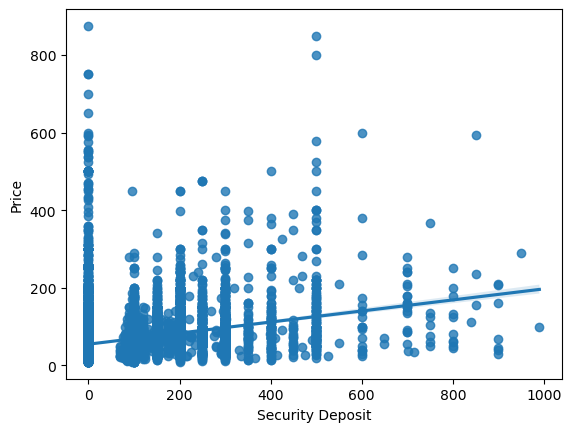

In [269]:
sns.regplot(data=df_madrid, x="Security Deposit", y="Price")
plt.xlabel("Security Deposit")
plt.ylabel("Price")
plt.show()

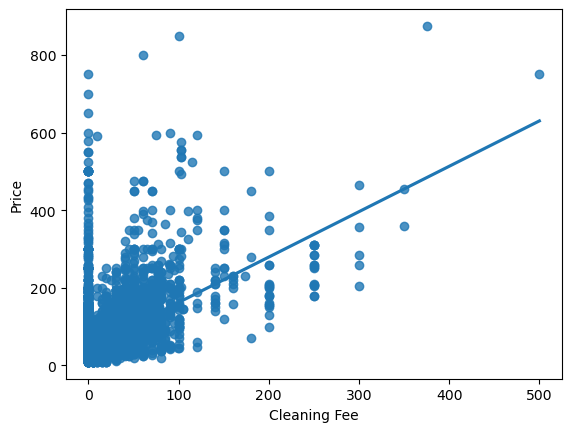

In [270]:
sns.regplot(data=df_madrid, x="Cleaning Fee", y="Price", ci=None)
plt.xlabel("Cleaning Fee")
plt.ylabel("Price")
plt.show()

#### *Vemos que en el caso de "Security Deposit", no parece  haber una tendencia lineal clara más allá de una cierta concentración en los precios menores independientemente del precio de alquiler, y por lo demás los precios parecen bastante distribuidos aleatoriamente. Pero en el caso de "Cleaning Fee", parece haber linealidad clara.
#### · Convertiré "Security Deposit" en categórica de sí o no presente: "Security Deposit Mandatory", y mantendré la original para comparar ambas.
#### · Mantendré "Cleaning Fee" como numérica, pero cambiando los Na por 0, asumiendo que si no hay, es que el propietario no ha establecido dichas tasas. Es interesante mantener la variable para el modelado a pesar de faltar tantos datos ya que parece clara una tendencia. Este cambio de NaNs será una directiva estructural de limpieza para los datos de entrada, resultando el cambio inocuo para el split de test, y permitiéndonos conservar muchos registros con gran cantidad de información.*

*-Empezamos por codificar "Security Deposit", la Fianza.*

In [271]:
len(df_madrid[df_madrid["Security Deposit"] !=0])

5645

In [272]:
def calcu(x):
    if x !=0:
        return 1
    else:
        return 0
df_madrid["Security Deposit Mandatory"] = df_madrid["Security Deposit"].apply(calcu)

In [273]:
len(df_madrid[df_madrid["Security Deposit Mandatory"] !=0])

5645

In [274]:
df_madrid["Security Deposit Mandatory"].unique()

array([0, 1])

In [275]:
df_madrid["Security Deposit Mandatory"].describe()

count    13263.000000
mean         0.425620
std          0.494455
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Security Deposit Mandatory, dtype: float64

#### · Volvemos a revisar el dataset

In [276]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13263 entries, 0 to 13262
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13263 non-null  object 
 1   Neighbourhood Group Cleansed  13263 non-null  object 
 2   Property Type                 13263 non-null  object 
 3   Room Type                     13263 non-null  object 
 4   Accommodates                  13263 non-null  int64  
 5   Bathrooms                     13214 non-null  float64
 6   Bedrooms                      13240 non-null  float64
 7   Beds                          13214 non-null  float64
 8   Bed Type                      13263 non-null  object 
 9   Price                         13254 non-null  float64
 10  Security Deposit              13263 non-null  float64
 11  Cleaning Fee                  13263 non-null  float64
 12  Guests Included               13263 non-null  int64  
 13  E

In [277]:
df_madrid.describe(include="all")

Neighbourhood Cleansed Neighbourhood Group Cleansed Property Type  \
count                   13263                        13263         13263   
unique                    126                           21            22   
top               Embajadores                       Centro     Apartment   
freq                     1849                         6775         10932   
mean                      NaN                          NaN           NaN   
std                       NaN                          NaN           NaN   
min                       NaN                          NaN           NaN   
25%                       NaN                          NaN           NaN   
50%                       NaN                          NaN           NaN   
75%                       NaN                          NaN           NaN   
max                       NaN                          NaN           NaN   

              Room Type  Accommodates     Bathrooms      Bedrooms  \
count             13263  13263.000000  13214.000000  13240.000000   
unique                3           NaN           NaN           NaN   
top     Entire home/apt           NaN           NaN           NaN   
freq               7926           NaN           NaN           NaN   
mean                NaN      3.188268      1.252649      1.294562   
std                 NaN      1.990342      0.599249      0.826208   
min                 NaN      1.000000      0.000000      0.000000   
25%                 NaN      2.000000      1.000000      1.000000   
50%                 NaN      2.000000      1.000000      1.000000   
75%                 NaN      4.000000      1.000000      2.000000   
max                 NaN     16.000000      8.000000     10.000000   

                Beds  Bed Type         Price  Security Deposit  Cleaning Fee  \
count   13214.000000     13263  13254.000000      13263.000000  13263.000000   
unique           NaN         5           NaN               NaN           NaN   
top              NaN  Real Bed           NaN               NaN           NaN   
freq             NaN     12968           NaN               NaN           NaN   
mean        1.984940       NaN     65.853327         78.091985     17.503054   
std         1.510227       NaN     55.971369        115.269090     24.672925   
min         1.000000       NaN      9.000000          0.000000      0.000000   
25%         1.000000       NaN     30.000000          0.000000      0.000000   
50%         2.000000       NaN     52.000000          0.000000     10.000000   
75%         2.000000       NaN     80.000000        150.000000     30.000000   
max        16.000000       NaN    875.000000        990.000000    500.000000   

        Guests Included  Extra People  Availability 90  Review Scores Rating  \
count      13263.000000  13263.000000     13263.000000          10411.000000   
unique              NaN           NaN              NaN                   NaN   
top                 NaN           NaN              NaN                   NaN   
freq                NaN           NaN              NaN                   NaN   
mean           1.573852      7.405112        40.078263             91.619921   
std            1.082323     10.749938        29.300551              8.985478   
min            1.000000      0.000000         0.000000             20.000000   
25%            1.000000      0.000000        13.000000             88.000000   
50%            1.000000      0.000000        38.000000             94.000000   
75%            2.000000     14.000000        65.000000             98.000000   
max           16.000000    276.000000        90.000000            100.000000   

        Cancellation Policy  Amenities Count  Security Deposit Mandatory  
count          13263.000000     13263.000000                13263.000000  
unique                  NaN              NaN                         NaN  
top                     NaN              NaN                         NaN  
freq                    NaN              Na

#### *Descubrimos por el describe() que el Review Scores Rating no parece una variable que nos vaya a dar información, ya que la media de la valoración es de casi 92 sobre 100, con una desviación estándar de menos de 9 puntos. La variable es casi plana a lo largo de los datos, no tiene casi varianza, y sólo añadirá ruido al modelo. Voy a graficarla contra el precio para ver si podrían guardar relación.*

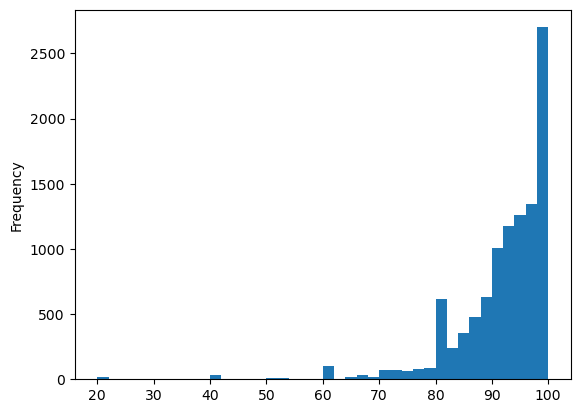

In [278]:
df_madrid["Review Scores Rating"].plot.hist(bins=40)
plt.show()

In [279]:
df_madrid["Review Scores Rating"].describe()

count    10411.000000
mean        91.619921
std          8.985478
min         20.000000
25%         88.000000
50%         94.000000
75%         98.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

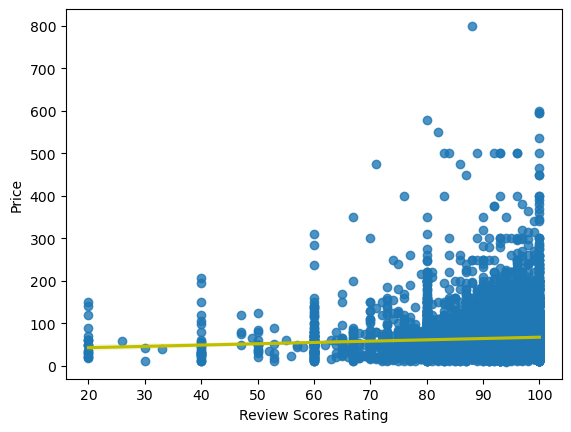

In [280]:
sns.regplot(data=df_madrid, x="Review Scores Rating", y="Price", line_kws=dict(color="y"))
plt.xlabel("Review Scores Rating")
plt.ylabel("Price")
plt.show()

*Parece evidente que esta variable no vale para predecir el precio.*

Veamos ahora qué porcentaje de NaNs hay para ver si los podemos eliminar.

In [281]:
percent = round((df_madrid["Review Scores Rating"].isna().sum()/len(df_madrid) *100),2)
print(f"El porcentaje de NaNs presente en la variable 'Review Scores Rating' es del {percent}%")

El porcentaje de NaNs presente en la variable 'Review Scores Rating' es del 21.5%


No podemos eliminar el 21.5% de los datos.  
Imputar el 21.5% de los datos con la media o la moda desvirtualizaría el dataset:

In [282]:
moda = sp.mode(df_madrid["Review Scores Rating"], nan_policy="omit")[0]
moda

100.0

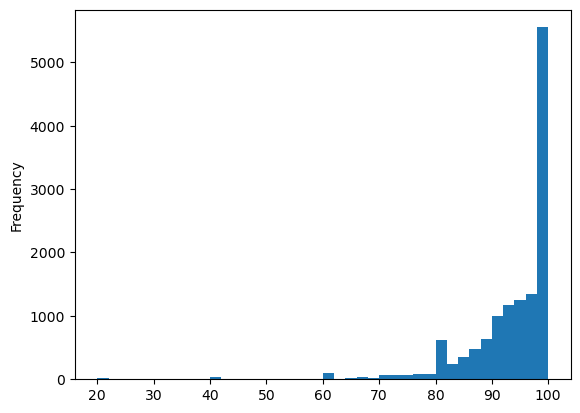

count    13263.000000
mean        93.421926
std          8.673552
min         20.000000
25%         90.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64

In [283]:
rating_imputado = df_madrid["Review Scores Rating"].fillna(moda)
rating_imputado.plot.hist(bins=40)
plt.show()
rating_imputado.describe()

<Axes: xlabel='Review Scores Rating', ylabel='Price'>

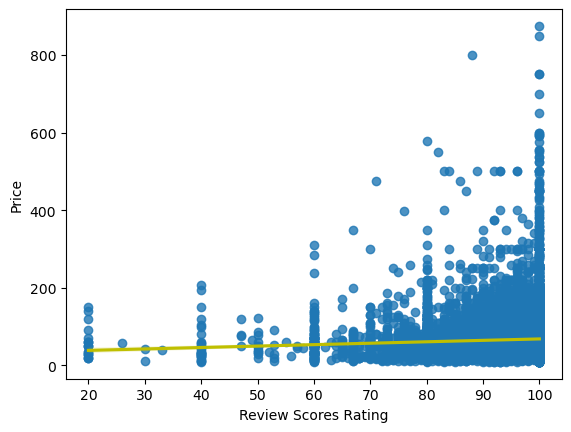

In [284]:
sns.regplot(data=df_madrid, x=rating_imputado, y="Price", line_kws=dict(color="y"))

#### Ya que a priori no parece ser buena predictora y que tiene un elevado porcentaje de NaNs y dado que imputar la variable no cambia el hecho de su poca varianza, eliminaré la variable.

In [285]:
df_madrid = df_madrid.drop("Review Scores Rating", axis=1)

#### · Ahora quiero revisar la variable Availability, quiero saber si parece tener algo que predecir:

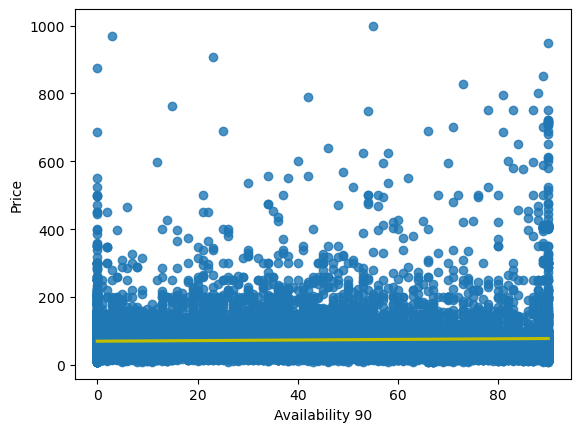

In [286]:
sns.regplot(data=df, y="Price", x="Availability 90", ci=None, line_kws=dict(color="y"))
plt.xlabel("Availability 90")
plt.ylabel("Price")
plt.show()

#### *A simple vista ya por la dispersión homogénea de los datos se puede ver que no vale para predecir el target. La línea de regresión lo confirma: Tiene una pendiente casi 0.*
#### Por lo tanto, eliminaré esta columna también del dataset. No merece la pena esperar al split de datos y que me lo diga una lasso.

In [287]:
df_madrid = df_madrid.drop("Availability 90", axis=1)

In [288]:
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13263 entries, 0 to 13262
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13263 non-null  object 
 1   Neighbourhood Group Cleansed  13263 non-null  object 
 2   Property Type                 13263 non-null  object 
 3   Room Type                     13263 non-null  object 
 4   Accommodates                  13263 non-null  int64  
 5   Bathrooms                     13214 non-null  float64
 6   Bedrooms                      13240 non-null  float64
 7   Beds                          13214 non-null  float64
 8   Bed Type                      13263 non-null  object 
 9   Price                         13254 non-null  float64
 10  Security Deposit              13263 non-null  float64
 11  Cleaning Fee                  13263 non-null  float64
 12  Guests Included               13263 non-null  int64  
 13  E

#### · Ahora eliminaré del dataset los registros que tengan Nan, que en el peor de los casos no llegará a 190.

In [289]:
# Guardo la extensión del dataset para cálculos posteriores:
len_madrid1 = len(df_madrid)
df_madrid = df_madrid.dropna(how='any')
df_madrid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13171 entries, 0 to 13262
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        13171 non-null  object 
 1   Neighbourhood Group Cleansed  13171 non-null  object 
 2   Property Type                 13171 non-null  object 
 3   Room Type                     13171 non-null  object 
 4   Accommodates                  13171 non-null  int64  
 5   Bathrooms                     13171 non-null  float64
 6   Bedrooms                      13171 non-null  float64
 7   Beds                          13171 non-null  float64
 8   Bed Type                      13171 non-null  object 
 9   Price                         13171 non-null  float64
 10  Security Deposit              13171 non-null  float64
 11  Cleaning Fee                  13171 non-null  float64
 12  Guests Included               13171 non-null  int64  
 13  Extra 

In [290]:
len_madrid2 = len(df_madrid)
perc_no_na = round(len_madrid2/len_madrid0*100,2)
print(f"Hemos conservado el {perc_no_na} de los datos que teníamos hasta ahora.")

Hemos conservado el 99.31 de los datos que teníamos hasta ahora.


In [291]:
print(f"El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el {round(len_madrid2/len_original*100,2)}")

El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el 89.11


#### *El resultado es bueno, teniendo en cuenta que había 1517 filas que no eran de Madrid y no deberían estar en la carga.*

_____

# Apartado 2: Split de los datos en Train y Test

In [294]:
df_madrid.to_csv('./df_madrid.csv', sep=';', decimal='.', index=False)

In [295]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=123)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10536, 17)
Dimensiones del dataset de test: (2635, 17)


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Cleansed        10536 non-null  object 
 1   Neighbourhood Group Cleansed  10536 non-null  object 
 2   Property Type                 10536 non-null  object 
 3   Room Type                     10536 non-null  object 
 4   Accommodates                  10536 non-null  int64  
 5   Bathrooms                     10536 non-null  float64
 6   Bedrooms                      10536 non-null  float64
 7   Beds                          10536 non-null  float64
 8   Bed Type                      10536 non-null  object 
 9   Price                         10536 non-null  float64
 10  Security Deposit              10536 non-null  float64
 11  Cleaning Fee                  10536 non-null  float64
 12  Guests Included               10536 non-null  int64  
 13  E

#### · Primero codifiquemos las variables categóricas restantes con un media encoder, tanto de Train como de Test usando las medias de Train para ambos:

In [363]:
cats = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type']

mean_dicc = {}
for cat in cats:
    mean = df.groupby(cat)['Price'].mean()
    df[cat] = df[cat].map(mean).round().astype(int)
    df_test[cat] = df_test[cat].map(mean).round().astype(int)
    df_test[cat].fillna(df["Price"].mean(), inplace=True)
    mean_dicc[cat] = mean


#### · Sigamos por revisar las correlaciones entre las variables.

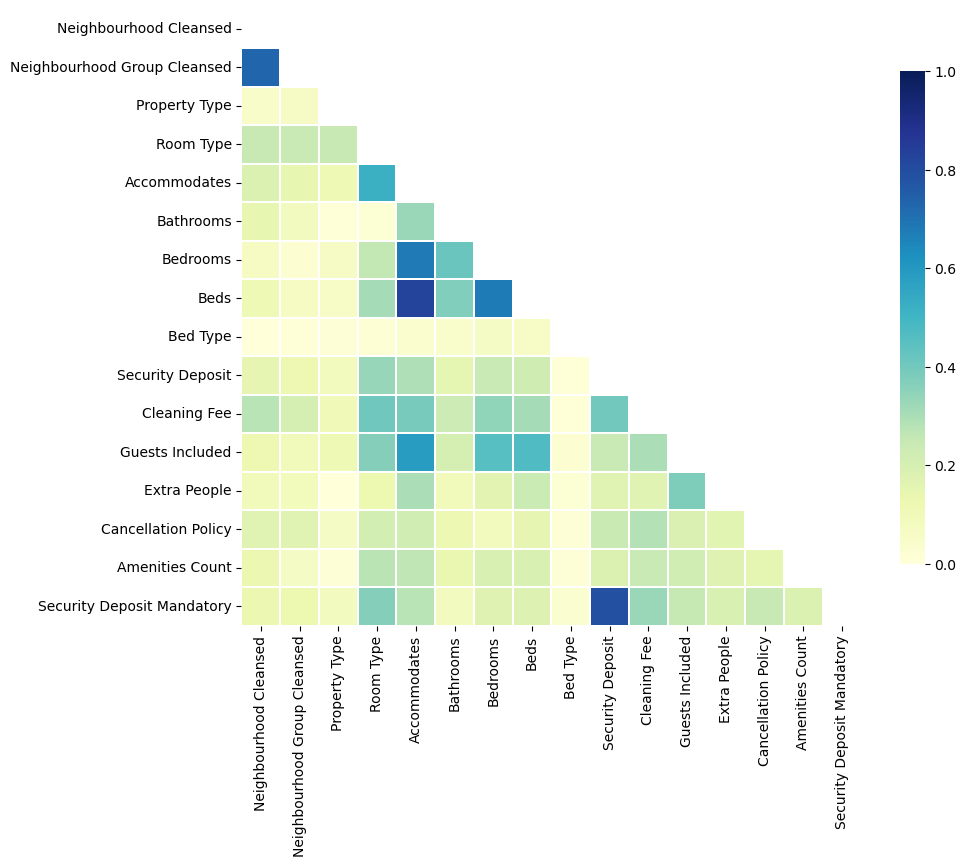

In [298]:
# Compute the correlation matrix
corr = np.abs(df.drop(["Price"], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [299]:
corr

Neighbourhood Cleansed  \
Neighbourhood Cleansed                      1.000000   
Neighbourhood Group Cleansed                0.727271   
Property Type                               0.054235   
Room Type                                   0.248964   
Accommodates                                0.184238   
Bathrooms                                   0.145415   
Bedrooms                                    0.070831   
Beds                                        0.111230   
Bed Type                                    0.001966   
Security Deposit                            0.151036   
Cleaning Fee                                0.274720   
Guests Included                             0.117993   
Extra People                                0.095721   
Cancellation Policy                         0.166825   
Amenities Count                             0.130405   
Security Deposit Mandatory                  0.131976   

                              Neighbourhood Group Cleansed  Property Type  \
Neighbourhood Cleansed                            0.727271       0.054235   
Neighbourhood Group Cleansed                      1.000000       0.066062   
Property Type                                     0.066062       1.000000   
Room Type                                         0.245474       0.248271   
Accommodates                                      0.146636       0.111423   
Bathrooms                                         0.085185       0.009807   
Bedrooms                                          0.024742       0.066208   
Beds                                              0.072403       0.062247   
Bed Type                                          0.011312       0.013402   
Security Deposit                                  0.120009       0.088019   
Cleaning Fee                                      0.206474       0.108924   
Guests Included                                   0.099692       0.111555   
Extra People                                      0.091119       0.000329   
Cancellation Policy                               0.170221       0.070229   
Amenities Count                                   0.070065       0.014792   
Security Deposit Mandatory                        0.127992       0.083919   

                              Room Type  Accommodates  Bathrooms  Bedrooms  \
Neighbourhood Cleansed         0.248964      0.184238   0.145415  0.070831   
Neighbourhood Group Cleansed   0.245474      0.146636   0.085185  0.024742   
Property Type                  0.248271      0.111423   0.009807  0.066208   
Room Type                      1.000000      0.521609   0.020093  0.256707   
Accommodates                   0.521609      1.000000   0.331115  0.681776   
Bathrooms                      0.020093      0.331115   1.000000  0.421090   
Bedrooms                       0.256707      0.681776   0.421090  1.000000   
Beds                           0.309958      0.828857   0.374046  0.677368   
Bed Type                       0.016882      0.037142   0.042518  0.069829   
Security Deposit               0.332078      0.295813   0.154891  0.242425   
Cleaning Fee                   0.407357      0.388862   0.231736  0.344388   
Guests Included                0.366609      0.587708   0.204159  0.453208   
Extra People                   0.126369      0.297825   0.099478  0.158267   
Cancellation Policy            0.214564      0.221833   0.123546  0.086069   
Amenities Count                0.269941      0.264304   0.137708  0.194305   
Security Deposit Mandatory     0.365566      0.274170   0.083409  0.173601   

                                  Beds  Bed Type  Security Deposit  \
Neighbourhood Cleansed        0.111230  0.001966          0.151036   
Neighbourhood Group Cleansed  0.072403  0.011312          0.120009   
Property Type                 0.062247  0.013402          0.088019   
Room Type                     0.309958  0.016882          0.332078   
Accommodates                  0.828857  0.037142          0.295813   
Bathrooms           

#### *La correlación sólo revela una fuerte relación entre "Accommodates" y "Beds", y entre "Beds" y "Bedrooms", entre los dos descriptores de Barrios y lógicamente entre las dos del Security Deposit. Las de los Neighbourhoods y las del Security Deposit las mantendré para lo análisis de importancia de las variables. Las otras tres las analizo a continuación.*   
#### Un poco de investigación en páginas especializadas en Internet me descubren un método para evaluar la posible multicolinealidad:  https://blog.clairvoyantsoft.com/correlation-and-collinearity-how-they-can-make-or-break-a-model-9135fbe6936a

El método VIF (Variance Inflaction Factor) proporciona una ayuda efectiva para detectar una tolerancia a la comultilinealidad. Por regla general y dependiendo del negocio un factor de 5 o más indica un problema de colinealidad, y deberían eliminarse una a una empezando por la de un VIF más elevado y volver a probar con el resto en modo cíclico hasta que ninguna de ellas supere el factor de 5.
Realizaré un test VIF para detectar cual de las variables debería eliminar, si es que es el caso, para solucionar el problema de redundancia de variables.

Primero comprobamos los factores de inflacción de la varianza de las 3 juntas:

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = df[["Beds", "Bedrooms", "Accommodates"]]
X_const = add_constant(X_vif)
vif1 = pd.Series([vif(X_const.values, i) for i in range(X_vif.shape[1])], index = X_vif.columns)
vif1

Beds            4.074899
Bedrooms        3.454913
Accommodates    2.020576
dtype: float64

Ahora probaremos a eliminar la más alta, Beds:

In [301]:
X_vif2 = df[["Bedrooms", "Accommodates"]]
X_const2 = add_constant(X_vif2)
vif2 = pd.Series([vif(X_const2.values, i) for i in range(X_vif2.shape[1])], index = X_vif2.columns)
vif2

Bedrooms        4.022804
Accommodates    1.868523
dtype: float64

Indaguemos un poco en las 3 variables. Haré una comparación de la relación lineal entre los pares de variables y el análisis de sus residuos.

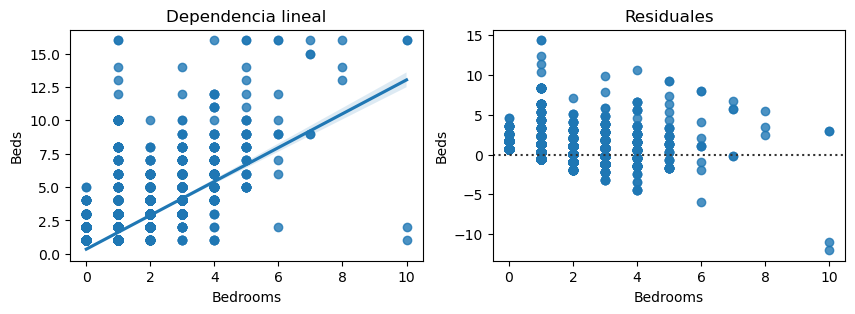

In [302]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=ax1, data=df, x="Bedrooms", y="Beds")
sns.residplot(ax=ax2, data=df, x="Bedrooms", y="Beds")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

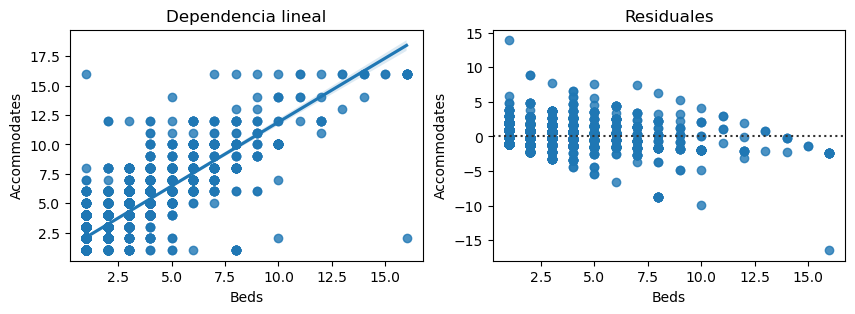

In [303]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=ax1, data=df, x="Beds", y="Accommodates")
sns.residplot(ax=ax2, data=df, x="Beds", y="Accommodates")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

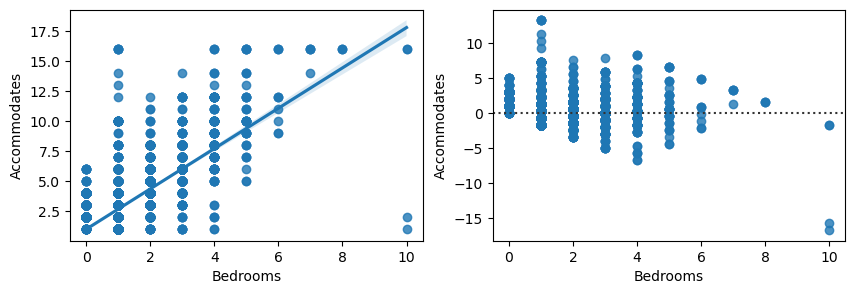

In [304]:
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.regplot(ax=axes[0], data=df, x="Bedrooms", y="Accommodates")
sns.residplot(ax=axes[1], data=df, x="Bedrooms", y="Accommodates")
ax1.set_title("Dependencia lineal")
ax2.set_title("Residuales")
plt.show()

Ya que la correlación entre Beds y Accommodates es la más alta (0.82), ya que su factor VIF es el más alto, y ya que en las gráficas se aprecian los valores más reunidos en torno a la regresión de la pareja Beds-Accommodates y sus residuales están un poco más equilibrados a ambos lados del error cero, eliminaré la variable Beds.

In [305]:
df = df.drop("Beds", axis=1)
df_test = df_test.drop("Beds", axis=1)

### · Ahora revisaremos posibles outliers.

In [364]:
import warnings
warnings.filterwarnings('ignore')
"""
fig, ax = plt.subplots(figsize=(14,9))
sns.boxenplot(ax=ax,x="Bedrooms", y="Price", data=df)
sns.swarmplot(ax=ax,x="Bedrooms", y="Price", data=df, alpha=.3, size=1.5, color="black")
plt.yscale("log")"""

'\nfig, ax = plt.subplots(figsize=(14,9))\nsns.boxenplot(ax=ax,x="Bedrooms", y="Price", data=df)\nsns.swarmplot(ax=ax,x="Bedrooms", y="Price", data=df, alpha=.3, size=1.5, color="black")\nplt.yscale("log")'

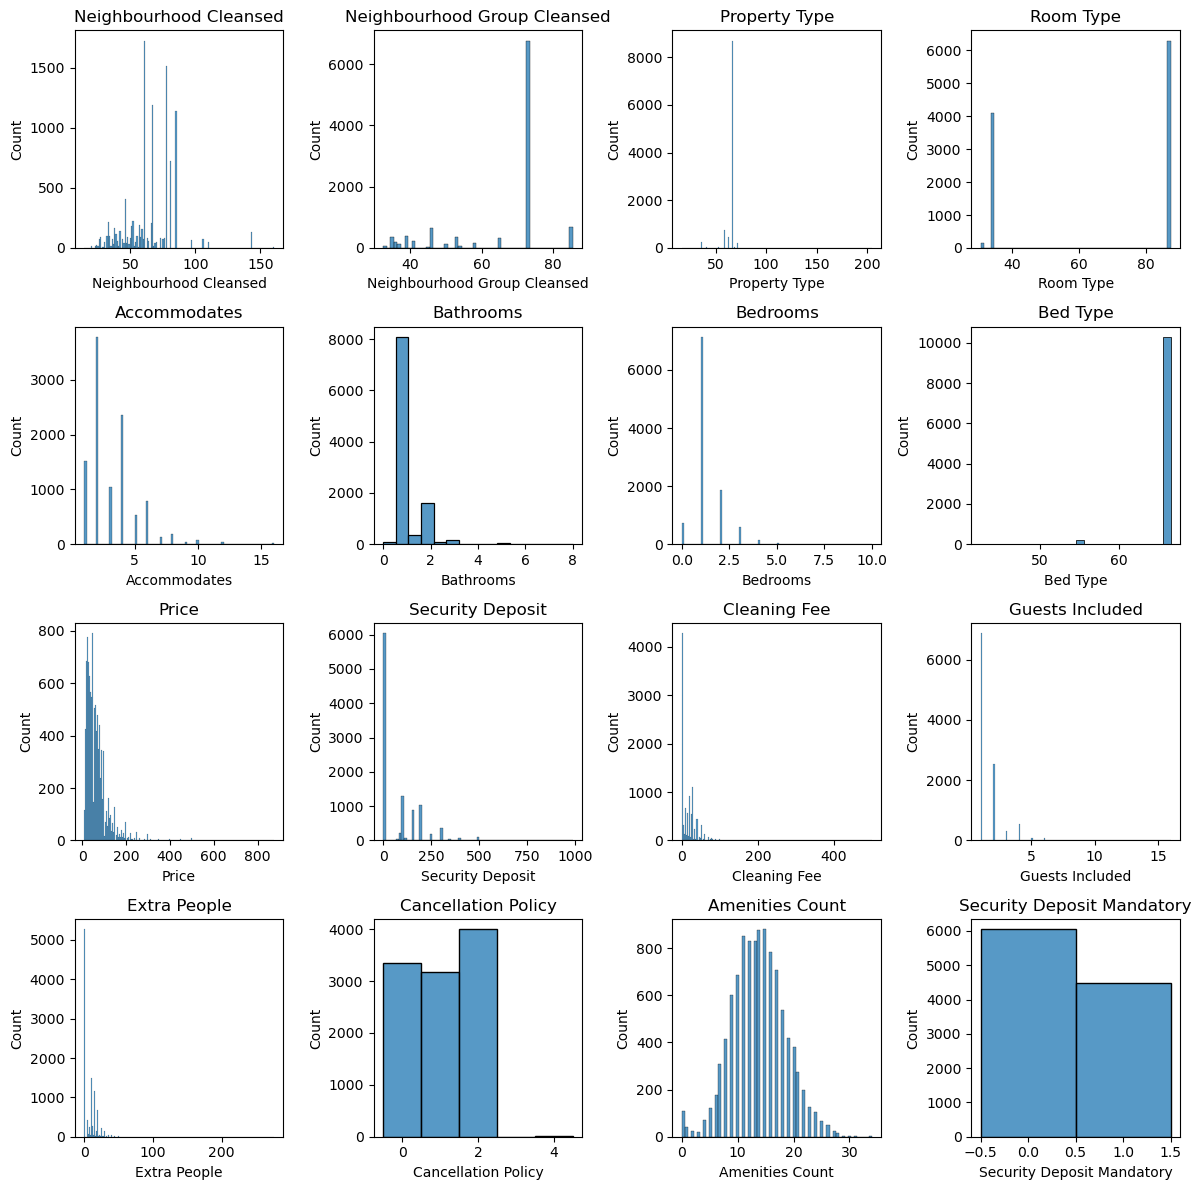

In [307]:
# Autoconfiguración de filas y columnas según el número de columnas del dataframe.
import math

num_cols = len(df.columns)
num_rows = math.ceil(num_cols / 4)

# Creo los subplots con los cálculos anteriores.
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))

# Coloco los axes en fila para poderlos mover mejor.
axes = axes.flatten()

# Eliminamos las celdas que no tengan gráfica
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Loop para colocar secuencialmente las gráficas en sus subplots
for i, col in enumerate(df.columns):
    # Creao un histograma para cada columna en el subplot correspondiente
    # Si es categórica, que ajuste el parámetro de hisplot() discrete=True
    if col in ["Neighbourhood Cleansed", "Neighbourhood Group Cleansed", "Property Type", "Room Type", "Bed Type", "Cancellation Policy", "Security Deposit Mandatory"]:
        sns.histplot(df[col], ax=axes[i], discrete=True)
        axes[i].set_title(col)
    else:
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col) 

plt.tight_layout()
plt.show()

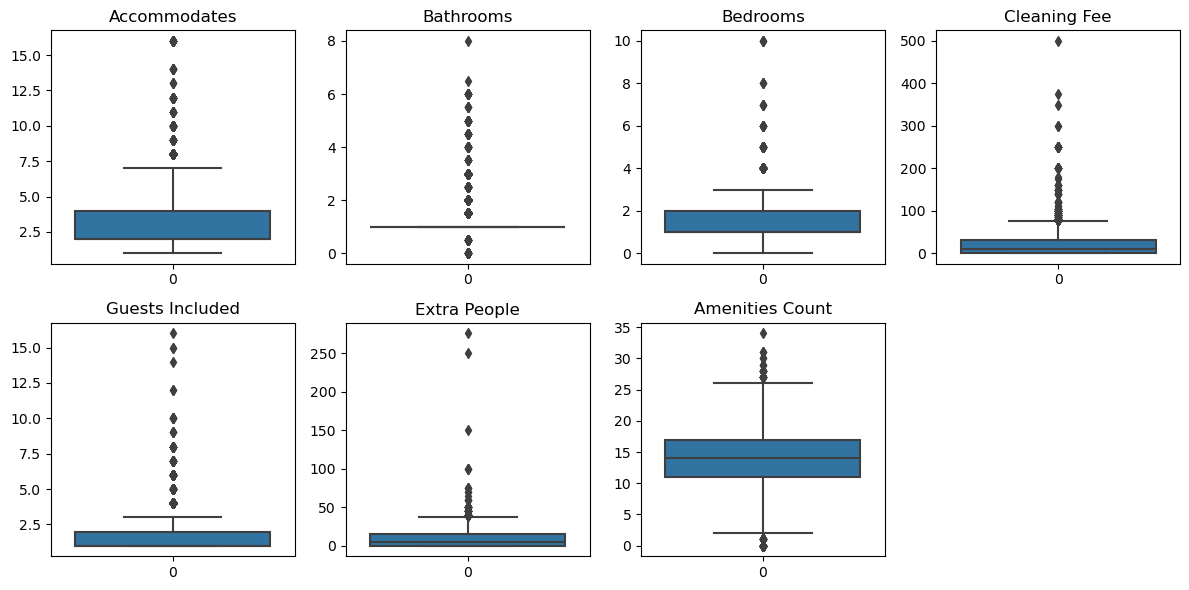

In [308]:
# Autoconfiguración de filas y columnas según el número de columnas del dataframe.
df_cualit = df[["Accommodates", "Bathrooms", "Bedrooms", "Cleaning Fee", "Guests Included", "Extra People", "Amenities Count"]]
num_cols = len(df_cualit.columns)
num_rows = math.ceil(num_cols / 4) # Para calcular las filas dividimos por 4 columnas de ancho en cada fila, y redondeamos al más alto.

# Creo los subplots con los cálculos anteriores.
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))

# Coloco los axes en fila para poderlos mover mejor.
axes = axes.flatten()

# Eliminamos las celdas que no tengan gráfica
for i in range(num_cols, num_rows * 4):
    fig.delaxes(axes[i])

# Loop para colocar secuencialmente las gráficas en sus subplots
for i, col in enumerate(df_cualit.columns):
    # Creo un boxplot para cada columna en el subplot correspondiente
    sns.boxplot(df_cualit[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### *Resultado del análisisde outliers:*

- Podemos ver por los histogramas que en las variables "Accommodates" y "Bathrooms", "Bedrooms" hay colas largas de valores muy bajos, pero es especialmente exagerado en las variables "Cleaning Fee", "Guests Included" y "Extra People". Vamos a analizar esos valores extremos empezando por las variables categóricas:

In [309]:
df_temp = pd.DataFrame(np.unique(df["Accommodates"], return_counts=True)).T
df_temp.columns=["Accommodates", "Count"]
df_temp.T

0     1     2     3    4    5    6    7   8   9   10  11  12  \
Accommodates     1     2     3     4    5    6    7    8   9  10  11  12  13   
Count         1528  3786  1042  2362  526  786  125  191  33  73  13  34   3   

              13  14  
Accommodates  14  16  
Count          9  25

En cuanto a los Accommodates, hay hasta 29 pisos a la vez que tengan más de 12, así que no parece probable que sean outliers. Se podría estudiar eliminar los que sean 12 o más si no es excesiva la pérdida de registros en total con las eliminaciones de los outliers de las demás variables

In [310]:
df_temp = pd.DataFrame(np.unique(df["Bathrooms"], return_counts=True)).T
df_temp.columns=["Bathrooms", "Count"]
df_temp.T

0     1       2      3       4     5      6     7     8     9   \
Bathrooms   0.0   0.5     1.0    1.5     2.0   2.5    3.0   3.5   4.0   4.5   
Count      49.0  50.0  8086.0  377.0  1602.0  78.0  181.0  11.0  26.0  21.0   

             10   11    12   13   14  
Bathrooms   5.0  5.5   6.0  6.5  8.0  
Count      33.0  4.0  16.0  1.0  1.0

En el caso de los baños, hasta 6 baños hay varias coincidencias, pero a partir de 13 sólo hay 4 casos. Se podría eliminar, aunque podrían ser verdaderos en caso de que las habitaciones sean de hoteles, casas de invitados, etc.... Probaré a usar todos los valores de momento.

In [311]:
df_temp = pd.DataFrame(np.unique(df["Bedrooms"], return_counts=True)).T
df_temp.columns=["Bedrooms", "Count"]
df_temp.T

0       1       2      3      4     5     6    7    8     9
Bedrooms    0.0     1.0     2.0    3.0    4.0   5.0   6.0  7.0  8.0  10.0
Count     731.0  7138.0  1872.0  585.0  147.0  41.0  10.0  5.0  3.0   4.0

En Bedrooms tenemos varias coincidencias en los valores más altos, mostrando que seguramente no son outliers. Pensaremos en su eliminación tras evaluar el modelo.

**Vamos con las variables numéricas con valores extremos:**
- Empezamos con "Cleaning Fee"

In [312]:
df["Cleaning Fee"].describe()

count    10536.000000
mean        17.486807
std         24.404467
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max        500.000000
Name: Cleaning Fee, dtype: float64

Se observa que hasta el 75% de los alquileres tienen una tasa igual o inferior a 30€. Veamos qué Tasa máxima tienen hasta el 99.5% de los datos:

In [313]:
np.percentile(df["Cleaning Fee"],99.5)

140.0

El 99.5% de los alquileres tienen una tasa hasta 126.5€. Son valores que a pesar de sera altos podrían estar relacionados con un tamaño grande de vivienda, o por el número de inquilinos totales, ya que se repiten varias veces, no parecen valores aislados, si no más bien una escala creciente progresivamente. Podríamos pensar en eliminar los superiores a ese valor, pero esperaremos al caso de eliminarlos hasta ver el desempeño del modelo.

In [314]:
df_temp = pd.DataFrame(np.unique(df["Cleaning Fee"]>150, return_counts=True)).T
df_temp.columns=["C. Fee", "Count"]
df_temp.T

0     1
C. Fee  False  True
Count   10496    40

In [315]:
df[df["Cleaning Fee"]>=150].sort_values(by="Cleaning Fee").tail(50)["Cleaning Fee"]

4750     150.0
7039     150.0
6434     150.0
6126     150.0
798      150.0
5531     150.0
4134     150.0
3707     150.0
2906     150.0
8374     160.0
7441     160.0
5696     160.0
9250     160.0
674      160.0
7096     174.0
5208     180.0
2020     200.0
8065     200.0
376      200.0
6773     200.0
6631     200.0
5213     200.0
10248    200.0
5445     200.0
4271     200.0
3915     200.0
3103     200.0
1662     200.0
3785     200.0
9004     200.0
8782     250.0
8741     250.0
183      250.0
1729     250.0
317      250.0
3675     250.0
599      250.0
3848     250.0
1012     250.0
1090     250.0
5457     250.0
1808     250.0
5240     250.0
1401     250.0
6396     300.0
16       300.0
5298     350.0
5067     375.0
10250    500.0
Name: Cleaning Fee, dtype: float64

Como vemos por este filtrado y por el gráfico de boxplot, lo que parecerían valores outliers pueden ser valores válidos, ya que resultan ser valores secuenciales muy próximos entre sí y que se repiten, pero a partir de 300 los voy a eliminar al estar muy alejados de los demás y tener sólo una coincidencia de cada.

In [316]:
# Filtramos ambas particiones por el máximo
df = df[df["Cleaning Fee"] <= 300]
df_test = df_test[df_test["Cleaning Fee"] <= 300]

- Continuemos con "Guests Included"

In [317]:
np.percentile(df["Guests Included"],99.5)

7.0

El 99.5% de los datos tienen como máximo 6 personas. Veamos cómo son los valores extremos:

In [318]:
df[df["Guests Included"] > 8].sort_values(by="Guests Included")["Guests Included"]

10343     9
1471      9
3780      9
4360      9
8511     10
7865     10
8915     10
903      10
2941     10
1191     10
4012     10
4770     12
4798     12
7437     14
1839     15
8540     15
4548     16
Name: Guests Included, dtype: int64

De nuevo vemos que los valores están agrupados, se repiten y son bastante consecutivos. No parece que sean outliers, pero podríamos eliminar los que están por encima de 10 para intentar mejorar el modelo. De momento no elimino nada.

- Acabemos con "Extra People"

In [319]:
df["Extra People"].describe()

count    10533.000000
mean         7.419539
std          9.998714
min          0.000000
25%          0.000000
50%          5.000000
75%         15.000000
max        276.000000
Name: Extra People, dtype: float64

In [320]:
np.percentile(df["Extra People"],95)

25.0

Veamos los valores mayores de 15:

In [321]:
df[df["Extra People"] > 25].sort_values(by="Extra People")["Extra People"].tail(30)

7517      50
3100      50
4566      50
5844      50
4750      50
5179      50
9065      50
5225      50
5513      50
2467      50
2572      50
9236      50
3965      50
5780      50
2745      60
10379     60
2924      60
812       60
3046      65
4484      70
1096      70
6331      75
8079      75
4061      75
582      100
9115     100
1623     100
6851     150
3785     250
1810     276
Name: Extra People, dtype: int64

En este caso se aprecian saltos muy grandes poco consecutivos al final de los datos ordenados. Vamos a eliminar los 3 últimos valores, desde 150, ya que sólo hay un caso de cada.

In [322]:
# Filtramos ambas particiones por el máximo
df = df[df["Extra People"] < 150]
df_test = df_test[df_test["Extra People"] < 150]

In [323]:
df.describe()

Neighbourhood Cleansed  Neighbourhood Group Cleansed  Property Type  \
count            10530.000000                  10530.000000   10530.000000   
mean                65.553561                     65.811491      65.406553   
std                 19.058553                     14.087804       6.340892   
min                 15.000000                     33.000000      17.000000   
25%                 55.000000                     58.000000      67.000000   
50%                 66.000000                     73.000000      67.000000   
75%                 78.000000                     73.000000      67.000000   
max                160.000000                     85.000000     204.000000   

          Room Type  Accommodates     Bathrooms      Bedrooms      Bed Type  \
count  10530.000000  10530.000000  10530.000000  10530.000000  10530.000000   
mean      65.610731      3.183666      1.247388      1.288699     65.716714   
std       26.050335      1.988446      0.585833      0.808608      1.963528   
min       31.000000      1.000000      0.000000      0.000000     43.000000   
25%       34.000000      2.000000      1.000000      1.000000     66.000000   
50%       87.000000      2.000000      1.000000      1.000000     66.000000   
75%       87.000000      4.000000      1.000000      2.000000     66.000000   
max       87.000000     16.000000      8.000000     10.000000     66.000000   

              Price  Security Deposit  Cleaning Fee  Guests Included  \
count  10530.000000      10530.000000  10530.000000     10530.000000   
mean      65.455271         77.642545     17.355745         1.578443   
std       54.338028        113.950835     23.408421         1.092880   
min        9.000000          0.000000      0.000000         1.000000   
25%       30.000000          0.000000      0.000000         1.000000   
50%       52.000000          0.000000     10.000000         1.000000   
75%       80.000000        150.000000     30.000000         2.000000   
max      850.000000        990.000000    300.000000        16.000000   

       Extra People  Cancellation Policy  Amenities Count  \
count  10530.000000         10530.000000     10530.000000   
mean       7.357455             1.062298        13.766192   
std        9.253547             0.835799         4.814681   
min        0.000000             0.000000         0.000000   
25%        0.000000             0.000000        11.000000   
50%        4.500000             1.000000        14.000000   
75%       15.000000             2.000000        17.000000   
max      100.000000             4.000000        34.000000   

       Security Deposit Mandatory  
count                10530.000000  
mean                     0.426591  
std                      0.494605  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000

### · Empecemos la selección de características basadas en modelos:

-- Primero normalizamos los datos y creamos los conjuntos de features y target, y le aplicamos el mismo tratamiento a los datos de test:

In [324]:
from sklearn import preprocessing

X = df.drop("Price", axis=1)
feature_names = X.columns
X_train = X.values
y_train = df["Price"].values

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [325]:

X_test = df_test.drop("Price", axis=1)
X_test = X_test.values
y_test = df_test["Price"].values

    
XtestScaled = scaler.transform(X_test)

1.- Primero haremos un test doble de F-test y Mutual Information

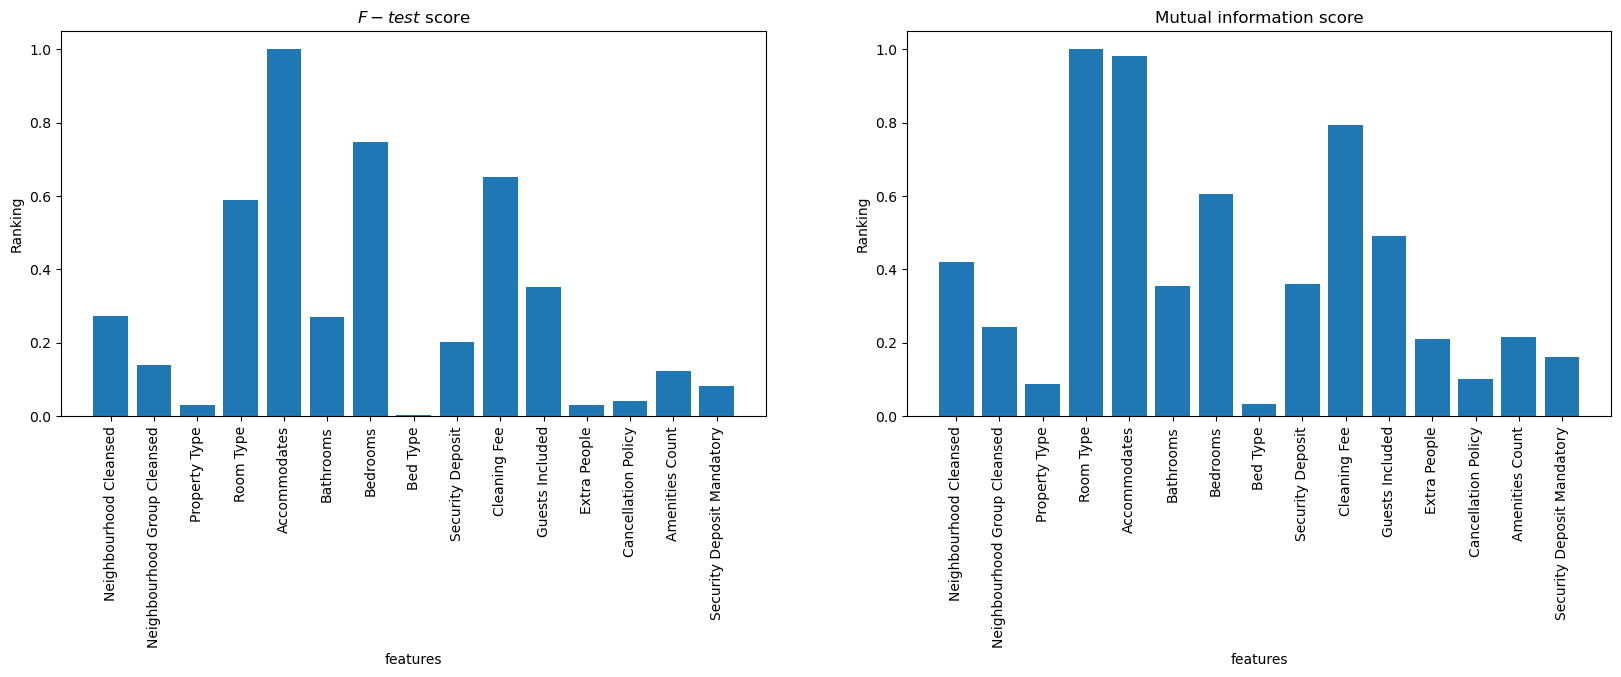

In [326]:
from sklearn.feature_selection import f_regression, mutual_info_regression

# do calculations
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

mi = mutual_info_regression(X_train, y_train)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X_train.shape[1]),f_test,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-test$ score')


plt.subplot(1,2,2)
plt.bar(range(X_train.shape[1]),mi,  align="center")
plt.xticks(range(X_train.shape[1]),feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Decisión basada en estos tests:  
En ambos tests, "Property Type" y "Bed Type" tienen un ranking casi nulo. Las eliminaría en un modelo de selección manual de características. "Cancellation Policy" también tiene un valor muy bajo en ambos tests, así que la eliminaría. Además, de las dos de los barrios la más importante es "Neighbourhood Cleansed", así que es la que conservaría para eliminar su correlación elevada. Po último, "Security Deposit" tiene mayor importancia que la binaria que creé yo, así que eliminaría "Security Deposit Mandatory".

-- Otra manera de evaluar la importancia de las features es con un wrapper. Usaré un RandomForestRegressor, que guarda las importancias en el atributo "feature_importances_"  
Si dejamos min_samples_leaf=1 conseguimos que se reflejen todas las características sin eliminar ninguna

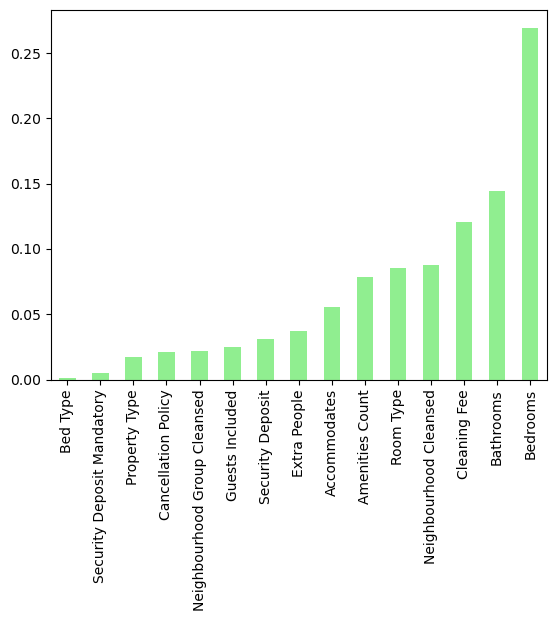

In [327]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf = RFR(n_estimators=100, min_samples_leaf=1, random_state=123)

rf.fit(X_train, y_train)

importancias = pd.Series(rf.feature_importances_, index=feature_names).sort_values()
importancias.plot(kind="bar", color="lightgreen")
plt.show()

Si queremos penalizar más las características, entonces basta con hacer mucho más pequeño el parámetro libre min_samples_leaf:

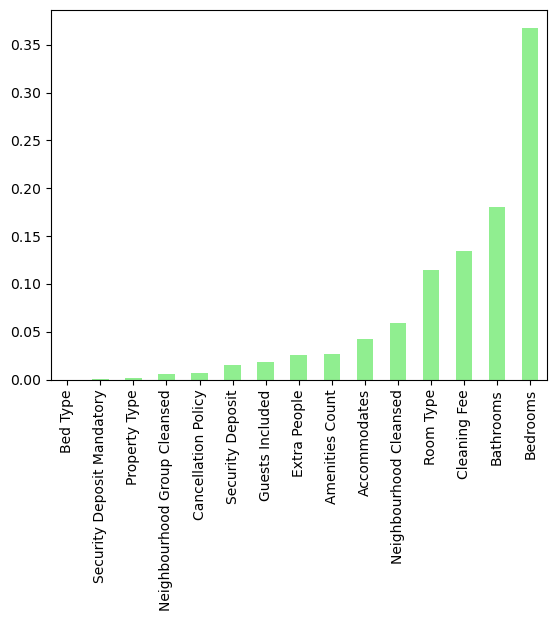

In [328]:

rf = RFR(n_estimators=100, min_samples_leaf=0.001, random_state=123)

rf.fit(X_train, y_train)

importancias = pd.Series(rf.feature_importances_, index=feature_names).sort_values()
importancias.plot(kind="bar", color="lightgreen")
plt.show()

Esto viene a confirmar el anterior método de filtrado. Quizás podríamos quitar "Guests Included", pero lo probaría en caso de que el modelo tenga overfitting.

-----

# Apartado 3: Modelado

## -- Modelo de Regresión Polinómica

Comencemos entonces con un modelo de regresión polinómica después de eliminar a mano estas variables fruto del análisis anterior de Importancia de Características: "Property Type", "Bed Type", "Cancellation Policy", "Neighbourhood Group Cleansed", "Security Deposit Mandatory"

In [228]:
# Filtrado:
df_filtered = df.drop(["Property Type", "Bed Type", "Cancellation Policy", "Security Deposit Mandatory", "Security Deposit"], axis=1)
df_test_filtered = df_test.drop(["Property Type", "Bed Type", "Cancellation Policy", "Security Deposit Mandatory", "Security Deposit"], axis=1)

# Separación del target en train y test y escalado según train.
from sklearn import preprocessing
# Para Train:
Xf = df_filtered.drop("Price", axis=1)
feature_names_f = Xf.columns
Xf_train = Xf.values
yf_train = df_filtered["Price"].values

scalerf = preprocessing.StandardScaler().fit(Xf_train)
XftrainScaled = scalerf.transform(Xf_train)

# Para Test:
Xf_test = df_test_filtered.drop("Price", axis=1)
Xf_test = Xf_test.values
yf_test = df_test_filtered["Price"].values
   
XftestScaled = scalerf.transform(Xf_test)



Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=1; total time=   0.0s
[CV] END .......................polynomialfeatures__degree=2; total time=   0.0s
[CV] END .......................polynomialfeatur

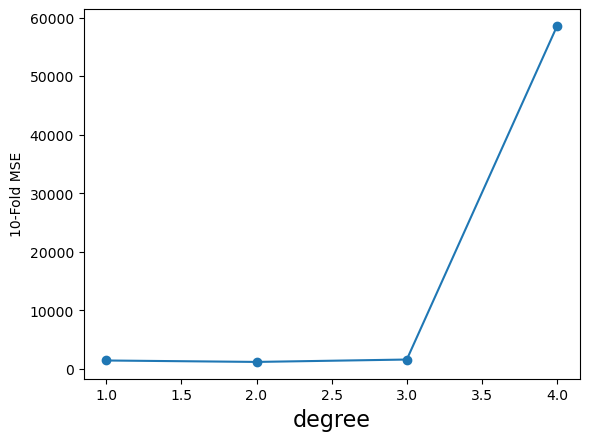

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as MSE

# Usaré un modelo de pipeline de sklearn para que el GridSearch pueda manipular varios modelos de procesado y modelado de manera simultánea.
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
# Grados polinómicos a probar (He llegado hasta 6 pero no aumenta la eficiencia y el tiempo de cálculo se multiplica por 10 con cada grado)
degrees = [1,2,3,4]
# Rejilla de grados
param_grid = {'polynomialfeatures__degree': degrees}
# GridSearch
grid2 = GridSearchCV(pipe, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=2)
grid2.fit(XftrainScaled, yf_train)

print("best mean cross-validation score: {:.3f}".format(grid2.best_score_))
print("best parameters: {}".format(grid2.best_params_))

#-1 porque es negado
scores = -1*np.array(grid2.cv_results_['mean_test_score'])
plt.plot(degrees,scores,'-o')
plt.xlabel('degree',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()



In [230]:
# Ahora personalizamos el modelo con el grado óptimo
degree_optimo = grid2.best_params_['polynomialfeatures__degree']
poly = PolynomialFeatures(degree_optimo) 
Xf_train_poly = poly.fit_transform(XftrainScaled)
Xf_test_poly = poly.fit_transform(XftestScaled)

# Entrenamos un modelo
lr = LinearRegression().fit(Xf_train_poly, yf_train)

# Hacemos predicción sobre ambas particiones y comparamos el RMSE
ytrainRegr = lr.predict(Xf_train_poly)
ytestRegr  = lr.predict(Xf_test_poly)
mseTrainModelRegressor = MSE(yf_train,ytrainRegr)
mseTestModelRegressor = MSE(yf_test,ytestRegr)

print('MSE Modelo Polinómico (train): %0.3g' % mseTrainModelRegressor)
print('MSE Modelo Polinómico (test) : %0.3g' % mseTestModelRegressor)

print('RMSE Modelo Polinómico (train): %0.3g' % np.sqrt(mseTrainModelRegressor))
print('RMSE Modelo Polinómico (test) : %0.3g' % np.sqrt(mseTestModelRegressor))

print("Score de Train: ", lr.score(Xf_train_poly, yf_train) )
print("Score de Test: ", lr.score(Xf_test_poly, yf_test) )

MSE Modelo Polinómico (train): 1.12e+03
MSE Modelo Polinómico (test) : 1.29e+03
RMSE Modelo Polinómico (train): 33.5
RMSE Modelo Polinómico (test) : 35.9
Score de Train:  0.6192745199114642
Score de Test:  0.6058016737153051


Dibujamos la predicción encima de los datos reales para comparar resultados:

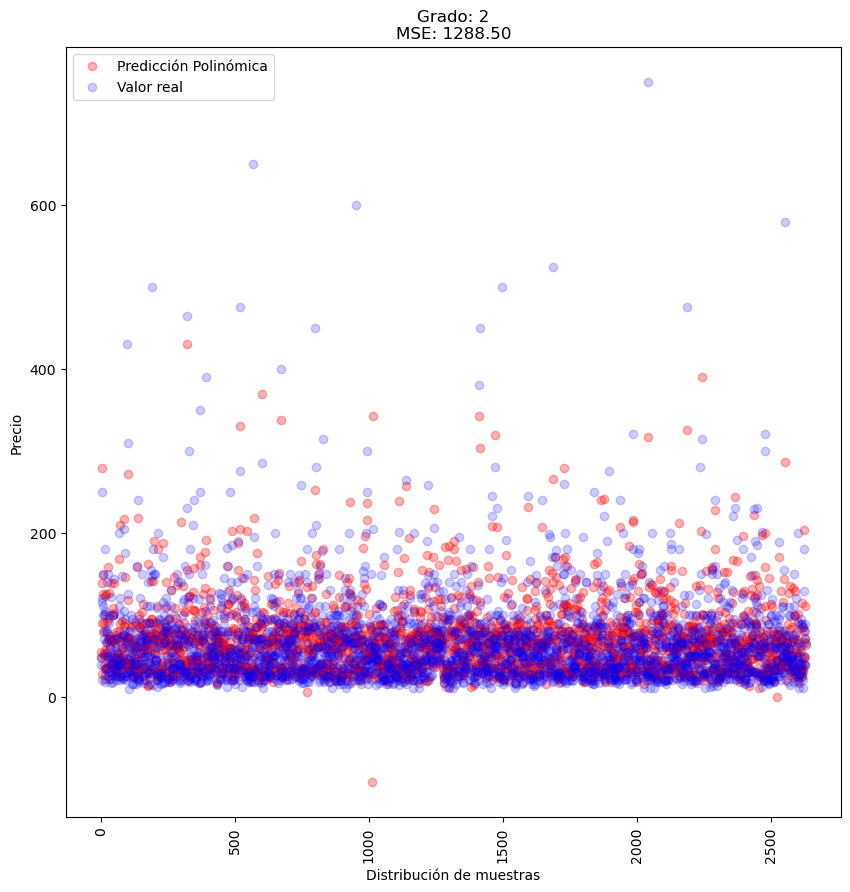

In [231]:
plt.figure(figsize = (10, 10))
plt.plot(ytestRegr, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Polinómica')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Grado: {degree_optimo}\nMSE: {mseTestModelRegressor:.2f}')
plt.legend()
plt.show()

Los datos predichos se ajustan muy bien al dataset real, menos en los valores altos.

<Axes: >

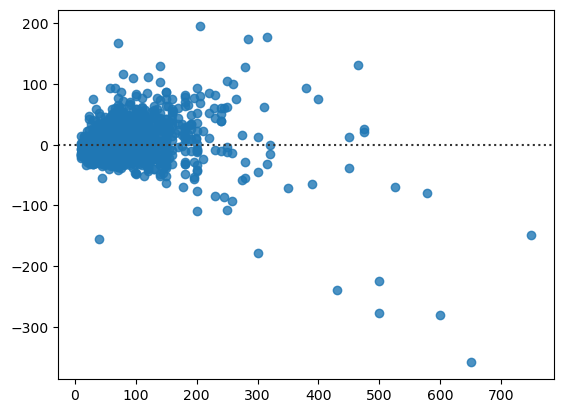

In [232]:
sns.residplot(x=yf_test,y=ytestRegr)

#### Conclusiones modelo Polinómico:

Se observa que el modelo polinómico de grado 2 ajusta muy bien con las features reducidas a mano, con errores muy parecidos en train y test y una distribución de residuales muy centrada en torno al cero y bastante simétrica. Sin embargo, no funciona bien para predecir precios de más de 200€, por lo que tendría que especificarse como indicación de uso en producción.

## -- Modelo con feature selection de Regresión Lasso

Ahora crearé un modelo de Regresión Lasso dejando que decida él las variables a eliminar.

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.11513953993264472; total time=   0.0s
[CV] END ..........................alpha=0.115

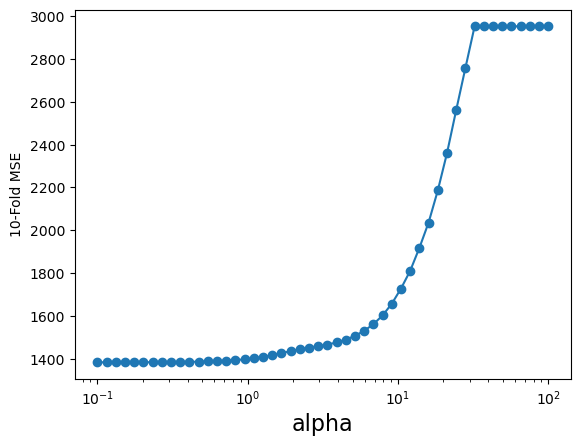

In [233]:
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,2,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

Se observa cómo el error empieza a aumentar en cuanto vamos quitando características. Eso nos dice que podemos quitar pocas variables antes de que el error se vuelva demasiado grande.

In [234]:
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = MSE(y_train,ytrainLasso)
mseTestModelLasso = MSE(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print("Score de Train: ", lasso.score(XtrainScaled,y_train) )
print("Score de Test: ", lasso.score(XtestScaled,y_test) )

MSE Modelo Lasso (train): 1.37e+03
MSE Modelo Lasso (test) : 1.5e+03
RMSE Modelo Lasso (train): 37.1
RMSE Modelo Lasso (test) : 38.8
Score de Train:  0.5348328923356584
Score de Test:  0.5396477764968042


Con un alpha de 0.1 para la Regresión lineal Lasso, obtenemos unas predicciones sobre el set de test muy buenas, con un error casi idéntico al de Train.

Podemos observar aquí qué coeficientes le ha asignado a las variables. Cabe reseñar que sólo ha eliminado 2 variables, y una tercera es casi 0.

In [103]:
w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

Neighbourhood Cleansed 9.637826978380076
Neighbourhood Group Cleansed 0.0
Property Type 0.0
Room Type 11.965410460907897
Accommodates 10.262581012930884
Bathrooms 7.372207765624038
Bedrooms 10.435881989520896
Bed Type 0.26689141466953165
Security Deposit 7.178886655933429
Cleaning Fee 10.695050539153515
Guests Included 1.9881695445943168
Extra People -3.664924420399352
Cancellation Policy -2.974372562760995
Amenities Count 1.0755476936994655
Security Deposit Mandatory -8.661456445187156


Dibujamos la superposición de los valores reales del dataset de test y del predicho por el modelo.

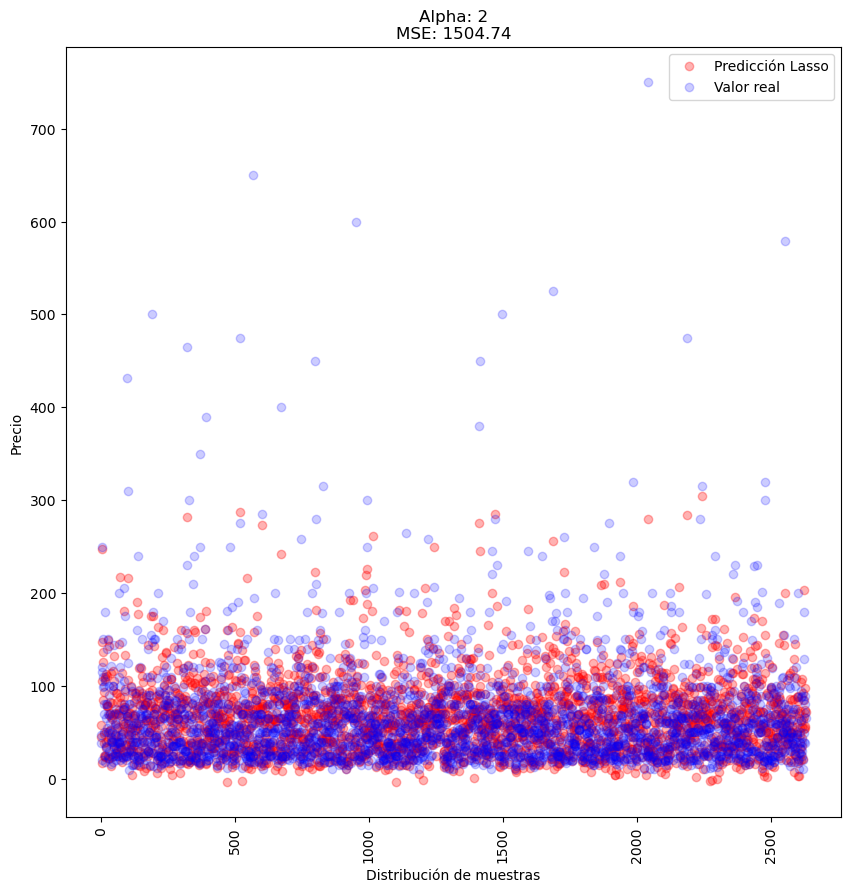

In [104]:
plt.figure(figsize = (10, 10))
plt.plot(ytestLasso, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(y_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Alpha: {degree_optimo}\nMSE: {mseTestModelLasso:.2f}')
plt.legend()
plt.show()

Se acercan mucho las predicciones a los valores reales, menos en los valores altos, algo lógico al no poder aprender de numerosos valores altos.

<Axes: >

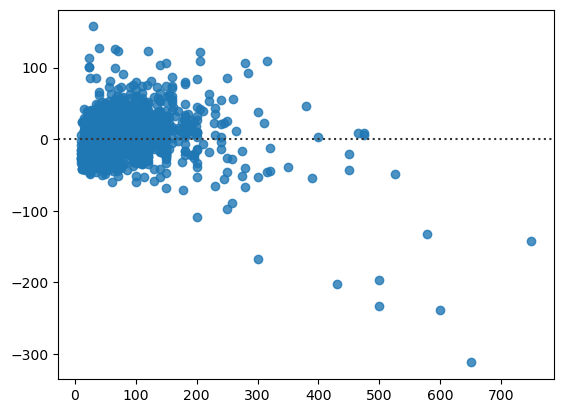

In [105]:
sns.residplot(x=y_test, y=ytestLasso)

El gráfico de residuales muestra que los errores se apiñan bastante en torno al cero y de manera bastante simétrica.

#### Conclusión del modelo Lasso:

Este modelo parece bastante fiable dentro de un rango de predicciones. El error generalizando sobre el buenoprediciendo sólo hasta unos 200€. De usar este modelo en producción hay que puntualizar este rango de uso. El desempeño del modelo mejora respecto a una Regresión polinómica eliminando sólo 2 características frente a las 5 eliminadas a mano en el modelo polinómica. No es mucha mejora, así que entre estos dos modelos Regresores cabría pensar en usar el modelo Polinómico anterior, ya que usa menos features y hace el modelo menos complejo. Sin embargo, calcular el Lasso es infinitamente más rápido que el cálculo de los polinomios, cuyo tiempo de proceso se multiplica al menos por 10 con cada grado de más por cada fold del cross validation. Por esto recomiendo de momento el uso de Lasso hasta ahora.

## -- Modelo RandomForest

In [176]:
from sklearn.ensemble import RandomForestRegressor as RFR

leaf_vector = [0.01, 0.005, 0.001, 0.0001, 0.00001]
dep_vector = range(9, 16)

param_grid = {'n_estimators': [100], 'min_samples_leaf': leaf_vector, 'max_depth': dep_vector}
grid3 = GridSearchCV(RFR(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
grid3.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid3.best_score_))
print("best parameters: {}".format(grid3.best_params_))


Fitting 10 folds for each of 35 candidates, totalling 350 fits
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.7s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.7s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.01, n_estimators=100; total time=   0.6s
[CV] END max_depth=9, min_samples_leaf=0.005, n_estimators=100; total time=   0.7s
[CV] END max_depth=9, min_samples_

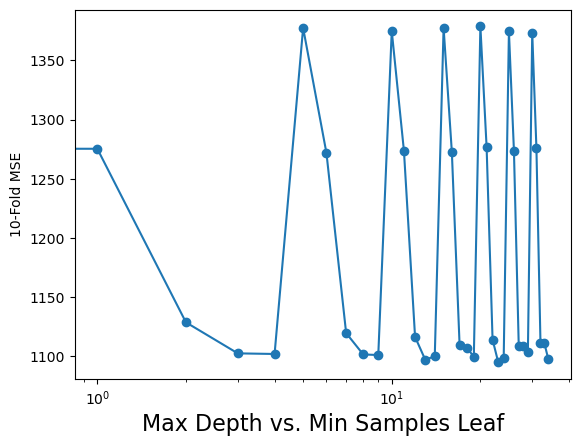

In [329]:
#-1 porque es negado
scores = -1*np.array(grid3.cv_results_['mean_test_score'])
plt.semilogx(scores,'-o')
plt.xlabel('Max Depth vs. Min Samples Leaf',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [330]:
grid3.best_params_

{'max_depth': 13, 'min_samples_leaf': 0.0001, 'n_estimators': 100}

In [331]:
leaf_optimo = grid3.best_params_['min_samples_leaf']
dep_optimo = grid3.best_params_["max_depth"]
rfr = RFR(n_estimators=100, min_samples_leaf=leaf_optimo, max_depth=dep_optimo).fit(XtrainScaled,y_train)

ytrainRFR = rfr.predict(XtrainScaled)
ytestRFR  = rfr.predict(XtestScaled)
mseTrainModelRFR = MSE(y_train,ytrainRFR)
mseTestModelRFR = MSE(y_test,ytestRFR)

print('MSE Modelo Random Forest (train): %0.3g' % mseTrainModelRFR)
print('MSE Modelo Random Forest (test) : %0.3g' % mseTestModelRFR)

print('RMSE Modelo Random Forest (train): %0.3g' % np.sqrt(mseTrainModelRFR))
print('RMSE Modelo Random Forest (test) : %0.3g' % np.sqrt(mseTestModelRFR))

print("Score de Train: ", rfr.score(XtrainScaled,y_train) )
print("Score de Test: ", rfr.score(XtestScaled,y_test) )

MSE Modelo Random Forest (train): 483
MSE Modelo Random Forest (test) : 1.19e+03
RMSE Modelo Random Forest (train): 22
RMSE Modelo Random Forest (test) : 34.5
Score de Train:  0.8364951023627569
Score de Test:  0.6351446136630272


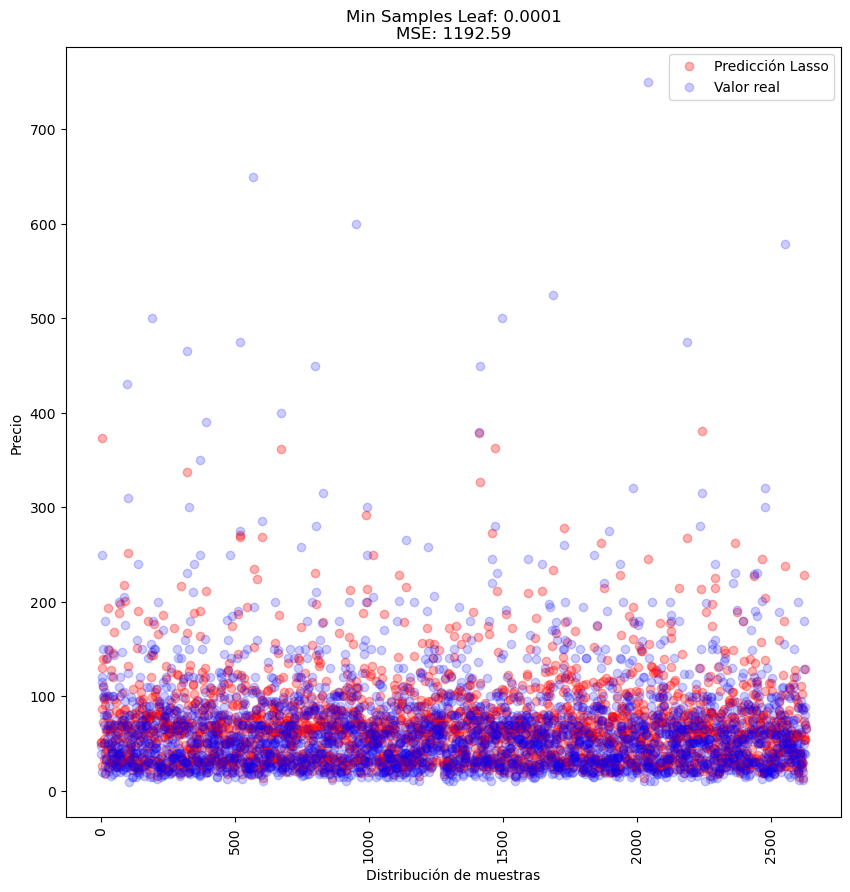

In [332]:
plt.figure(figsize = (10, 10))
plt.plot(yftestRFR, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Min Samples Leaf: {leaf_optimo}\nMSE: {mseTestModelRFR:.2f}')
plt.legend()
plt.show()

<Axes: >

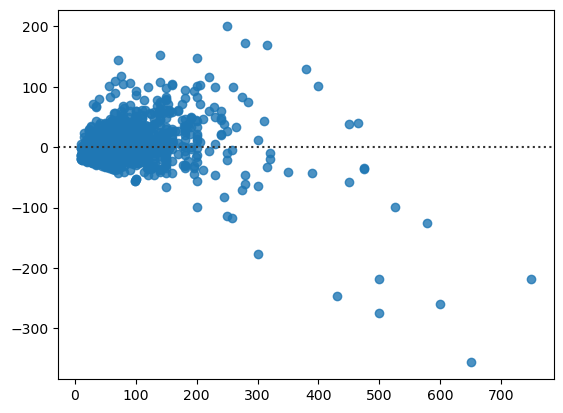

In [333]:
sns.residplot(x=yf_test, y=yftestRFR)

In [334]:
print(f"Ratio de mejora de error del RFR sobre el error del Polinómico en Training es del {round(100 -np.sqrt(mseTrainModelRFR)/np.sqrt(mseTrainModelRegressor)*100,2)}%")
print(f"Ratio de mejora de error del RFR sobre el error del Polinómico generalizando es del {round(100 -np.sqrt(mseTestModelRFR)/np.sqrt(mseTestModelRegressor)*100,2)}%")

Ratio de mejora de error del RFR sobre el error del Polinómico en Training es del 34.47%
Ratio de mejora de error del RFR sobre el error del Polinómico generalizando es del 3.79%


### Conclusiones Modelo RandomForest

##### Este modelo es más rápido de entrenar que el modelo de Regresión Polinómica, y con mejores resultados que los dos modelos anteriores en Training (casi un 20% menor que el ), y ligeramente mejor en Test (un 7.5% menos de error).

## -- Modelo BoostTree

In [350]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import RandomizedSearchCV

leaf_vector = [0.1, 0.01, 0.001]
dep_vector = range(8, 14)
estim_vector = np.arange(100, 1000, 100)
learn_vector = [0.001,0.01,0.1,1,2,3]
param_grid = {'n_estimators': estim_vector,'max_depth': dep_vector, 'learning_rate':learn_vector}
grid4 = RandomizedSearchCV(GBR(), scoring= 'neg_mean_squared_error', param_distributions=param_grid, cv = 7, verbose=2, n_iter=15)
grid4.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid4.best_score_))
print("best parameters: {}".format(grid4.best_params_))


Fitting 7 folds for each of 15 candidates, totalling 105 fits
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.1s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.2s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.1s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.1s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.1s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.2s
[CV] END .learning_rate=0.001, max_depth=8, n_estimators=600; total time=   7.2s
[CV] END ....learning_rate=3, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END ....learning_rate=3, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END ....learning_rate=3, max_depth=12, n_estimators=100; total time=   1.8s
[CV] END ....learning_rate=3, max_depth=12, n_estimators=100; total time=   1.7s
[CV] END ....learning_rate=3, max_depth=12, n_e

In [357]:

dep_optimo = grid4.best_params_["max_depth"]
learn_optimo = grid4.best_params_["learning_rate"]
estim_optimo = grid4.best_params_["n_estimators"]

gbr = GBR(n_estimators=estim_optimo, max_depth=dep_optimo, learning_rate=learn_optimo).fit(XtrainScaled,y_train)

ytrainGBR = gbr.predict(XtrainScaled)
ytestGBR  = gbr.predict(XtestScaled)
mseTrainModelGBR = MSE(y_train,ytrainGBR)
mseTestModelGBR = MSE(y_test,ytestGBR)

print('MSE Modelo Gradient Boosting (train): %0.3g' % mseTrainModelGBR)
print('MSE Modelo Gradient Boosting (test) : %0.3g' % mseTestModelGBR)

print('RMSE Modelo Gradient Boosting (train): %0.3g' % np.sqrt(mseTrainModelGBR))
print('RMSE Modelo Gradient Boosting (test) : %0.3g' % np.sqrt(mseTestModelGBR))

print("Score de Train: ", gbr.score(XtrainScaled,y_train) )
print("Score de Test: ", gbr.score(XtestScaled,y_test) )

MSE Modelo Gradient Boosting (train): 401
MSE Modelo Gradient Boosting (test) : 1.22e+03
RMSE Modelo Gradient Boosting (train): 20
RMSE Modelo Gradient Boosting (test) : 35
Score de Train:  0.8641277289245535
Score de Test:  0.6258080675190845


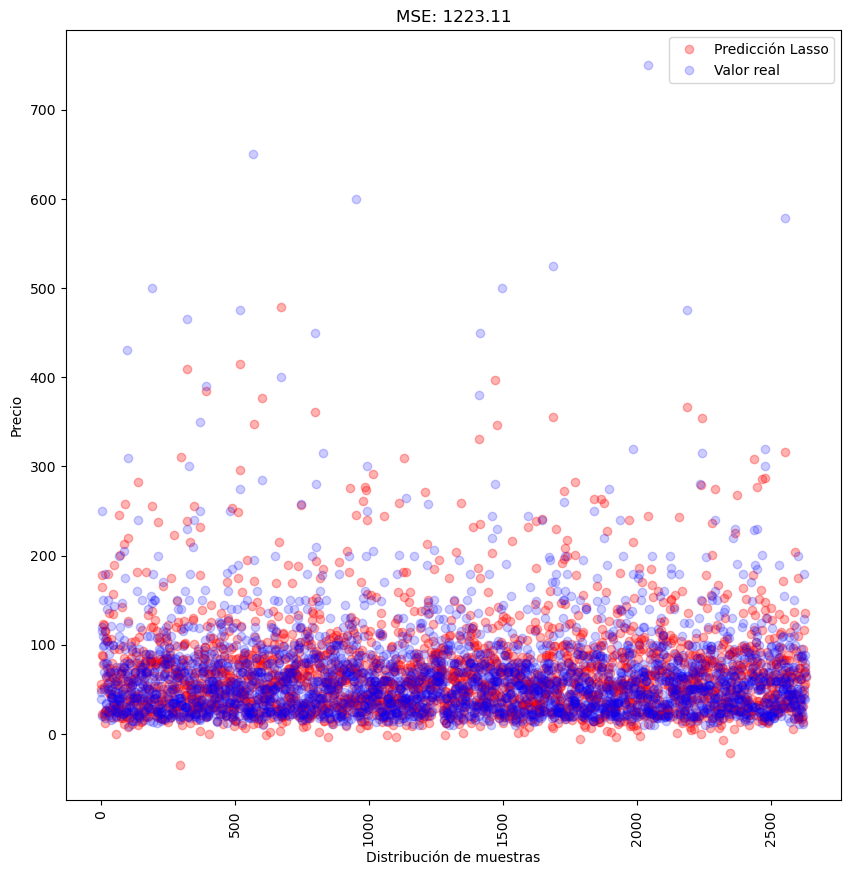

In [358]:
plt.figure(figsize = (10, 10))
plt.plot(yftestGBR, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'MSE: {mseTestModelGBR:.2f}')
plt.legend()
plt.show()

<Axes: >

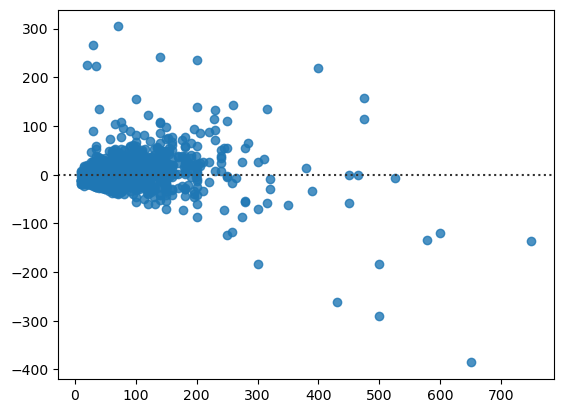

In [356]:
sns.residplot(x=y_test, y=ytestGBR)

### Conclusión Modelo GradientBoost

Dada la complejidad de estos modelos, la búsqueda con GridSearchCV se hace imposiblemente larga, por lo que usé un Randomized Search. Ha sido ejecutado más de 20 veces con muchas combinaciones de parámetros, y no funciona muy bien. Sus resultados son similares al RandomForest, pero hay mayor diferencia entre los resultados de Train y Test.

# Conclusiones de modelado:

Da igual el tipo de modelo, todos resultan en un mal resultado en predicción, debido principalmente a los alquileres con precios superiores a 200€. No hay suficientes para que el modelo aprenda correctamente. Se ha realizado una prueba eliminando los precios mayores de 200, y los resultados son bastante mejores. No filtraremos por el precio, aunque sería aconsejable limitar los datos a aquellos de menos de 250€, ya que no llegan a ser el 2.5% de los datos totales, y establecer alertas por si el porcentaje de datos con un precio superior empiezan a ser significativos en cuanto a porcentaje total de los datos.  
El Modelo elegido es el RandomForest, ya que en Train no tiene mucho overfitting, y los resultados en predicción son los mejores, aunque hay una diferencia mayor que en otros modelos mucho más equilibrados entre Train y Test, pero que tienen scores más bajos.  
Sólo queda avisar de que estos modelos no pueden predecir con fiabilidad datos con rangos de precios a partir de 200€.

In [361]:
len(df_madrid[df_madrid["Price"]>200])/len(df_madrid)*100

2.285323817477792

----

# PIPELINE FINAL:

En el pipeline mantendré el GridSearchCV para la selección automática de los parámetros del modelo.  
Si desea desactivarlo, símplemente comente el bloque de código cambie los parámetros del modelo rfr por los valores:  
'max_depth' = 12  
'min_samples_leaf' = 1e-05  
'n_estimators' = 100  
Descomentar el bloque de código siguiente eliminando las triples comillas al principio y al final:

In [ ]:
"""
# Librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del daaset:
url = "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/airbnb-listings/exports/csv?lang=en&qv1=(Madrid)&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B"
df = pd.read_csv(url, sep=";")
len_original = len(df)

# Filtrado de ciudad
df_madrid = df[df.City.str.contains("Mad") | df.City.str.contains("mad") | df.City.str.contains("MAD") | df.City.str.contains("Aravaca") | df.City.str.contains("villa verde bajo") | df.City.str.contains("Chueca") | df.City.str.contains("Ventas") | df.City.str.contains("Boadilla") | df.City.str.contains("Elipa") | df.City.str.contains("Pozuelo") | df.City.str.contains("de Henares") | df.City.str.contains("Delicias")]
len_madrid0 = len(df_madrid)

# Selección final de columnas:
df_madrid = df_madrid[['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed','Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms','Bed Type', 'Security Deposit', 'Cleaning Fee', 'Guests Included','Extra People', 'Cancellation Policy', 'Amenities', 'Price']]

# Procesado de Amenities:
df_madrid.reset_index(drop=True, inplace=True)
for idx, row in df_madrid.Amenities.items():
    counter=0
    if not pd.isna(row):
        for word in row.split(sep=","):
            if "translation missing" not in word:
                counter += 1
    df_madrid.loc[idx,"Amenities Count"] = int(counter)

df_madrid["Amenities Count"] = df_madrid["Amenities Count"].astype(int)
df_madrid = df_madrid.drop("Amenities", axis=1)

# Label Encoding de "Cancellation Policy"
from sklearn.preprocessing import LabelEncoder
le_canc = LabelEncoder()
df_madrid["Cancellation Policy"] = le_canc.fit_transform(df_madrid["Cancellation Policy"])
listado_canc = [(idx,clase) for idx, clase in enumerate(le_canc.classes_)]
listado_canc

# Imputación de Cleaning Fee y Security Deposit:
df_madrid["Cleaning Fee"] = df_madrid["Cleaning Fee"].fillna(0)
df_madrid["Security Deposit"] = df_madrid["Security Deposit"].fillna(0)

# Creación de variable "Security Deposit Mandatory":
def calcu(x):
    if x !=0:
        return 1
    else:
        return 0
df_madrid["Security Deposit Mandatory"] = df_madrid["Security Deposit"].apply(calcu)

# Descarte de NaNs restantes en el dataset:
len_madrid1 = len(df_madrid)
df_madrid = df_madrid.dropna(how='any')

# Informe de resultados del preprocesado:
len_madrid2 = len(df_madrid)
perc_no_na = round(len_madrid2/len_madrid0*100,2)
print(f"Hemos conservado el {perc_no_na} de los datos que teníamos en el deataset sólo de Madrid.")
print(f"El pipeline de preprocesado desde la carga de los datos hasta el final ha conservado el {round(len_madrid2/len_original*100,2)}")

# Grabación del archivo en disco:
df_madrid.to_csv('./df_madrid.csv', sep=';', decimal='.', index=False)

# Particionamos el dataset en Train y Test y los guardamos:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_madrid, test_size=0.2, shuffle=True, random_state=123)

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

# Cargamos las particiones de datos: 
df = pd.read_csv('./train.csv', sep=';', decimal='.')
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# Creamos las categorías:
cats = ['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Property Type', 'Room Type', 'Bed Type']
mean_dicc = {}
for cat in cats:
    mean = df.groupby(cat)['Price'].mean()
    df[cat] = df[cat].map(mean).round().astype(int)
    df_test[cat] = df_test[cat].map(mean).round().astype(int)
    df_test[cat].fillna(df["Price"].mean(), inplace=True)
    mean_dicc[cat] = mean

# Filtrado de Outliers:
df = df[df["Cleaning Fee"] <= 300]
df_test = df_test[df_test["Cleaning Fee"] <= 300]

df = df[df["Extra People"] < 150]
df_test = df_test[df_test["Extra People"] < 150]

# Escalado de los datos y separación de features y target:
from sklearn import preprocessing

X = df.drop("Price", axis=1)
feature_names = X.columns
X_train = X.values
y_train = df["Price"].values
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

X_test = df_test.drop("Price", axis=1)
X_test = X_test.values
y_test = df_test["Price"].values
XtestScaled = scaler.transform(X_test)

# Comienzo de modelado con RandomForest:

# Para desactivar GridSearchCV y pasar a parámetros manuales, comentar desde la siguiente línea......
from sklearn.ensemble import RandomForestRegressor as RFR
print("\n\n¡Modelado con Random Forest Regressor Iniciado!\n")
leaf_vector = [0.01, 0.005, 0.001, 0.0001, 0.00001]
dep_vector = range(9, 16)
param_grid = {'n_estimators': [100], 'min_samples_leaf': leaf_vector, 'max_depth': dep_vector}
grid = GridSearchCV(RFR(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10, verbose=2)
print("\nComenzando búsqueda de mejores parámetros, tardará entre 5 y 10 minutos:....\n\n")
import time
start = time.time()
grid.fit(XtrainScaled, y_train)
end = time.time()
print("\nTiempo empleado en el cálculo: ", end-start, "segundos.\n\n")
print("\nMejor puntuación en Cross-Validation: {:.3f}".format(grid.best_score_))
print("\nMejores Parámetros: {}".format(grid.best_params_))

leaf_optimo = grid.best_params_['min_samples_leaf']
dep_optimo = grid.best_params_["max_depth"]
# ....hasta aquí.


# Parametrización del modelo. Para que no use GridSearchCV, comentar el bloque anterior de código
# y sustituir los parámetros por 'max_depth' = 12, 'min_samples_leaf' = 1e-05, 'n_estimators' = 100
rfr = RFR(n_estimators=100, min_samples_leaf=leaf_optimo, max_depth=dep_optimo).fit(XtrainScaled,y_train)

ytrainRFR = rfr.predict(XtrainScaled)
ytestRFR  = rfr.predict(XtestScaled)
mseTrainModelRFR = MSE(y_train,ytrainRFR)
mseTestModelRFR = MSE(y_test,ytestRFR)

# Informe de rendimiento:
print('\n\nMSE Modelo Random Forest (train): %0.3g' % mseTrainModelRFR)
print('MSE Modelo Random Forest (test) : %0.3g' % mseTestModelRFR)

print('\nRMSE Modelo Random Forest (train): %0.3g Euros' % np.sqrt(mseTrainModelRFR))
print('RMSE Modelo Random Forest (test) : %0.3g Euros' % np.sqrt(mseTestModelRFR))

print("\nScore de Train: ", rfr.score(XtrainScaled,y_train) )
print("Score de Test: ", rfr.score(XtestScaled,y_test) )

# Gráfico de datos:
print("\n\nPresentando predicciones:\n")
plt.figure(figsize = (8, 8))
plt.plot(yftestRFR, alpha=0.3,marker='o',linestyle="none", markersize=6,color='red',label='Predicción Lasso')
plt.plot(yf_test, alpha=0.2,marker='o',linestyle="none", markersize=6,color='blue',label='Valor real')
plt.xticks(rotation = 90)
plt.ylabel("Precio")
plt.xlabel("Distribución de muestras")
plt.title(f'Superposición de datos reales contra Datos predichos\nMSE: {mseTestModelRFR:.2f}')
plt.legend()
plt.show()

# Informe de residuales:
print("\n\nGráfica de residuales:")
sns.residplot(x=yf_test, y=yftestRFR)

"""